# Plotting 2: Fixed $r_\mathrm{inv} = 0.3$ and Varying $\Lambda_d$

## 1. Import Packages

In [1]:
# The Python Standard Library

# The Third-Party Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from matplotlib.ticker import (AutoLocator, MaxNLocator)
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, LogLocator)

# My Packages
from plotting import plotting

# increase figure showing resolution
%config InlineBackend.figure_format = 'retina'

## 2. Load Datasets

In [2]:
path_data = '/youwei_u3/svj_data_master/scheme_2/analysis_script_v1/'
dataset_csv = ['status23', 'status71', 'jet', 'met', 'jet_met',
               'n_jet', 'jj', 'jjj', 'jj_met', 'jjj_met']
dataset_npz = ['neutrinos', 'weight']
# fixed rinv = 0.3 and varying Lambdad = [5, 10, 100, 300]
Lambdad = [5, 10, 100, 300]

# load .csv & .npz into pd.DataFrame() & np.array()
dataset, weight_npz = [], []
for i, Ld in enumerate(Lambdad):
    print(f'{i + 1}. Lambdad = {Ld}')
    folder = f'Lambdad{int(Ld)}_rinv3/'
    file = f'_rinv3_Lambdad{int(Ld)}'
    print(path_data + folder + file)
    npz = np.load(path_data + folder + 'weight' + file + '_ckkwl.npz', allow_pickle=True)
    weight_npz.append(npz)
    for j, data in enumerate(dataset_csv):
        # print(j, folder + data + file + '_ckkwl.csv')
        df = pd.read_csv(path_data + folder + data + file + '_ckkwl.csv')
        dataset.append(df)
    print('-'*80)

1. Lambdad = 5
/youwei_u3/svj_data_master/scheme_2/analysis_script_v1/Lambdad5_rinv3/_rinv3_Lambdad5
--------------------------------------------------------------------------------
2. Lambdad = 10
/youwei_u3/svj_data_master/scheme_2/analysis_script_v1/Lambdad10_rinv3/_rinv3_Lambdad10
--------------------------------------------------------------------------------
3. Lambdad = 100
/youwei_u3/svj_data_master/scheme_2/analysis_script_v1/Lambdad100_rinv3/_rinv3_Lambdad100
--------------------------------------------------------------------------------
4. Lambdad = 300
/youwei_u3/svj_data_master/scheme_2/analysis_script_v1/Lambdad300_rinv3/_rinv3_Lambdad300
--------------------------------------------------------------------------------


In [3]:
# every 10 is a cycle
for j, data in enumerate(dataset_csv):
    print(j, data)

0 status23
1 status71
2 jet
3 met
4 jet_met
5 n_jet
6 jj
7 jjj
8 jj_met
9 jjj_met


### A. Simple check

In [4]:
print(f'{len(dataset)} data in dataset')
print(f'{len(weight_npz)} data in weight_npz')

40 data in dataset
4 data in weight_npz


In [5]:
dataset[12].head()

,N_jet,pT_1,pT_2,pT_3,pT_4,eta_1,eta_2,eta_3,eta_4,phi_1,phi_2,phi_3,phi_4,mass_1,mass_2,mass_3,mass_4
0,1.0,164.570935,-999.000000,-999.000000,-999.000000,-1.478989,-999.000000,-999.000000,-999.000000,2.852932,-999.000000,-999.000000,-999.000000,28.684020,-999.000000,-999.000000,-999.000000
1,1.0,44.801528,-999.000000,-999.000000,-999.000000,-0.071429,-999.000000,-999.000000,-999.000000,-0.323035,-999.000000,-999.000000,-999.000000,2.753434,-999.000000,-999.000000,-999.000000
2,5.0,174.009609,66.700819,65.657223,51.163060,-1.306962,1.348032,1.335818,2.053751,2.828226,-0.216328,0.470224,-0.065918,20.893138,9.805571,13.174438,7.202809
3,6.0,72.943279,43.463813,43.303103,36.169812,1.060919,-0.786159,1.677120,1.667658,-1.114778,-0.466475,1.180138,-0.870686,9.282890,9.107902,4.301428,6.863120
4,4.0,236.670854,142.342339,29.945496,29.136239,-0.822772,1.170535,0.755338,0.271360,-2.517634,0.615083,0.955454,0.648968,24.878356,27.313674,6.892694,4.491247


In [6]:
weight_npz[0]['weight_2']

array([2.7949634e-14, 2.7949634e-14, 4.1366087e-14, ..., 3.5438452e-14,
       2.7949634e-14, 2.7949634e-14], dtype=float32)

In [7]:
Lambdad = [5, 10, 100, 300]
print('when fixed rinv = 0.3:')
for i in range(len(weight_npz)):
    print(f"* cross-section of Lambdad {Lambdad[i]} GeV = {np.sum(weight_npz[i]['weight_2'] * (10**9))} pb")

when fixed rinv = 0.3:
* cross-section of Lambdad 5 GeV = 0.5777782906857286 pb
* cross-section of Lambdad 10 GeV = 0.5769518776984781 pb
* cross-section of Lambdad 100 GeV = 0.5760819443684619 pb
* cross-section of Lambdad 300 GeV = 0.5760454566963117 pb


##### Conclusion: Well done!!

## 3. Plot

In [8]:
# * define global parameters
# binning, color, label
binning, binning_50gev = np.linspace(0, 5000, 51), np.linspace(0, 5000, 101)
binning_eta, binning_phi = np.linspace(-10, 10, 41), np.linspace(0, np.pi, 21)
binning_pm_phi = np.linspace(-np.pi, np.pi, 21)
color = ['red', 'green', 'blue', 'purple']
label = [r'$\Lambda_d = 5$ GeV', r'$\Lambda_d = 10$ GeV',
         r'$\Lambda_d = 100$ GeV', r'$\Lambda_d = 300$ GeV']

# text
# a. with preselection
text = [r'$\sqrt{s} = 13$ TeV', r'$m_{Z^\prime} = 1500$ GeV',
        r'$r_\mathrm{inv} = 0.3$', 'Preselection']
# b. with truth level
text_truth = [r'$\sqrt{s} = 13$ TeV', r'$m_{Z^\prime} = 1500$ GeV',
              r'$r_\mathrm{inv} = 0.3$', 'Truth level']
# c. with event selection Njet >= 2
text_Njet2 = [r'$\sqrt{s} = 13$ TeV', r'$m_{Z^\prime} = 1500$ GeV',
              r'$r_\mathrm{inv} = 0.3$', r'$N_\mathrm{jet} \geq 2$']
# d. with event selection Njet >= 3
text_Njet3 = [r'$\sqrt{s} = 13$ TeV', r'$m_{Z^\prime} = 1500$ GeV',
              r'$r_\mathrm{inv} = 0.3$', r'$N_\mathrm{jet} \geq 3$']
text_xy = (0.05, 0.93)

# selected events
# a. truth level and preselection
selected_all = [np.arange(dataset[i].shape[0]) for i in range(0, len(dataset), 10)]
# b. dijet
selected_jj = [dataset[i+6]['selected'].to_numpy().astype('int64') for i in range(0, len(dataset), 10)]
# c. trijet
selected_jjj = [dataset[i+7]['selected'].to_numpy().astype('int64') for i in range(0, len(dataset), 10)]

# weight
weight = [weight_npz[i]['weight_2'] * (10**9) for i in range(len(weight_npz))]
weight_normalized = [(weight_npz[i]['weight_2'] * (10**9))/np.sum(weight_npz[i]['weight_2'] * (10**9)) for i in range(len(weight_npz))]
print('Define normalized weights for leading 4 jets in the truth level:')
weight_j1_norm1, weight_j2_norm1, weight_j3_norm1, weight_j4_norm1 = [], [], [], []
for i, d in enumerate([0, 10, 20, 30]):
    print(f'{i+1}. data {d}, normalized weight of [j_1 j_2 j_3 j_4] =')
    d1, d2 = dataset[d+2]['pT_1'].to_numpy(), dataset[d+2]['pT_2'].to_numpy()
    d3, d4 = dataset[d+2]['pT_3'].to_numpy(), dataset[d+2]['pT_4'].to_numpy()
    w = weight[i]
    weight_j1_norm1.append(w/np.sum(w[d1 >= 0]))
    weight_j2_norm1.append(w/np.sum(w[d2 >= 0]))
    weight_j3_norm1.append(w/np.sum(w[d3 >= 0]))
    weight_j4_norm1.append(w/np.sum(w[d4 >= 0]))
    hist1, bins = np.histogram(d1, bins=binning, weights=w/np.sum(w[d1 >= 0]))
    hist2, bins = np.histogram(d2, bins=binning, weights=w/np.sum(w[d2 >= 0]))
    hist3, bins = np.histogram(d3, bins=binning, weights=w/np.sum(w[d3 >= 0]))
    hist4, bins = np.histogram(d4, bins=binning, weights=w/np.sum(w[d4 >= 0]))
    print(f'   {np.sum(hist1), np.sum(hist2), np.sum(hist3), np.sum(hist4)}')

# weight for dijet and trijet
weight_jj_norm1, weight_jjj_norm1 = [], []
for i, d in enumerate([0, 10, 20, 30]):
    w = weight[i]
    weight_jj_norm1.append(w/np.sum(w[selected_jj[i]]))
    weight_jjj_norm1.append(w/np.sum(w[selected_jjj[i]]))

print('*'*80)
# print the information
Lambdad = [5, 10, 100, 300]
for i, Ld in enumerate(Lambdad):
    print(f'* Lambdad = {Ld} GeV: cross-section = {np.sum(weight[i])} pb')
    print(f'          normalized = {np.sum(weight_normalized[i])}')
    print('-'*60)

Define normalized weights for leading 4 jets in the truth level:
1. data 0, normalized weight of [j_1 j_2 j_3 j_4] =
   (1.0000000000001348, 0.9999999999998179, 0.9999999999995298, 0.9999999999999816)
2. data 10, normalized weight of [j_1 j_2 j_3 j_4] =
   (0.9999999999998517, 0.9999999999998999, 0.9999999999998392, 1.0000000000001923)
3. data 20, normalized weight of [j_1 j_2 j_3 j_4] =
   (1.000000000000309, 1.000000000000168, 1.000000000000031, 0.999999999999536)
4. data 30, normalized weight of [j_1 j_2 j_3 j_4] =
   (0.9999999999998063, 0.9999999999999897, 1.000000000000329, 1.0000000000004468)
********************************************************************************
* Lambdad = 5 GeV: cross-section = 0.5777782906857286 pb
          normalized = 1.0
------------------------------------------------------------
* Lambdad = 10 GeV: cross-section = 0.5769518776984781 pb
          normalized = 0.9999999999999998
------------------------------------------------------------
* Lamb

In [9]:
selected_all

[array([    0,     1,     2, ..., 19370, 19371, 19372]),
 array([    0,     1,     2, ..., 19349, 19350, 19351]),
 array([    0,     1,     2, ..., 19334, 19335, 19336]),
 array([    0,     1,     2, ..., 19346, 19347, 19348])]

In [10]:
[np.sum(weight_jj_norm1[i][selected_jj[i]]) for i in range(4)]

[0.9999999999999997, 1.0000000000000002, 1.0, 1.0]

In [11]:
[np.sum(weight_jjj_norm1[i][selected_jjj[i]]) for i in range(4)]

[1.0, 1.0, 1.0, 1.0]

### 3-1. Dark quark pair and truth level
* $M(\chi, \bar{\chi})$
* $M_T(\chi, \bar{\chi})$
* $m_T(\chi, \bar{\chi})$
* $\Delta\phi(\chi, \bar{\chi})$
* $\Delta\eta(\chi, \bar{\chi})$
* $p_T(\chi)$, $p_T(\bar{\chi})$
* $\eta(\chi)$, $\eta(\bar{\chi})$

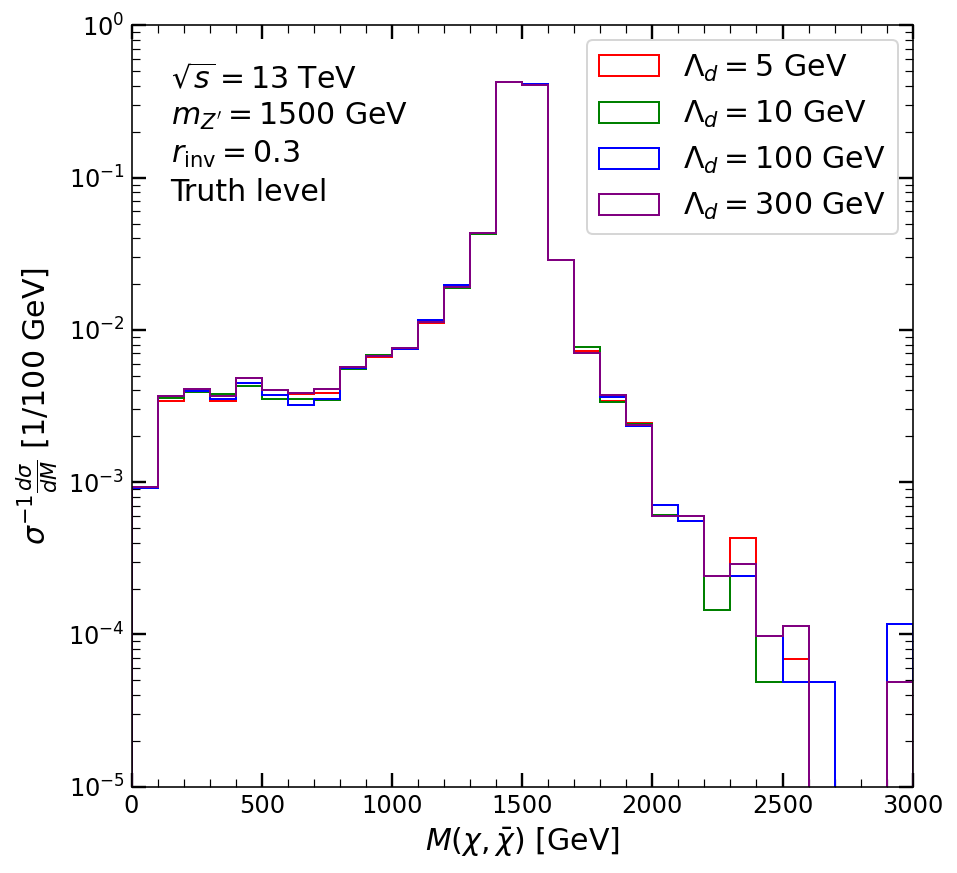

--------------------------------------------------------------------------------
Area of Lambdad [5, 10, 100, 300] = [1. 1. 1. 1.]


In [12]:
# 1. M(xd, xdx)
hist, bins = plotting('M_xdxdx', [dataset[i] for i in range(0, len(dataset), 10)],
                      binning, color, label,
                      weight=weight_normalized, selected=selected_all,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$M(\chi, \bar{\chi})$ [GeV]',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{dM}$ [1/100 GeV]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, 3000), ylim=(1/100000, 1),
                      text=text_truth, text_xy=text_xy,
                      savefig='./figures_2_rinv3_varying_Lambdad/fig_01-M_xdxdx.pdf')
print('-'*80)
print(f'Area of Lambdad {Lambdad} = {np.sum(hist, axis=1)}')

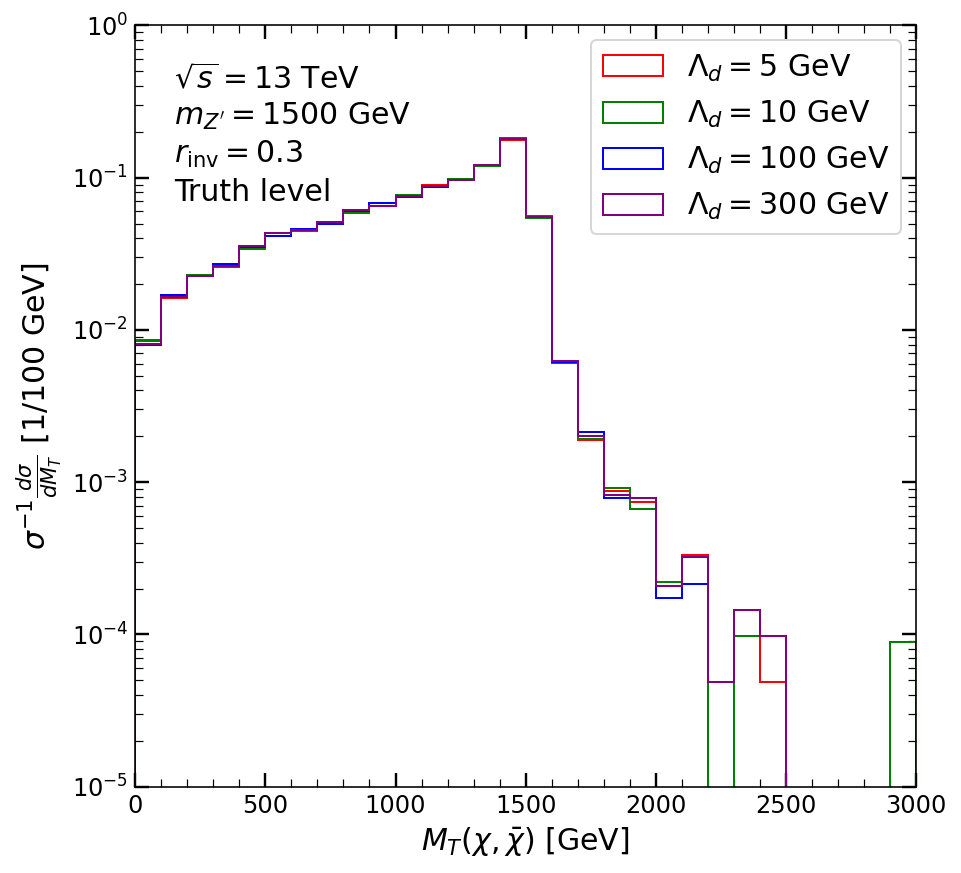

--------------------------------------------------------------------------------
Area of Lambdad [5, 10, 100, 300] = [1. 1. 1. 1.]


In [13]:
# 2. M_T(xd, xdx)
hist, bins = plotting('MT_xdxdx', [dataset[i] for i in range(0, len(dataset), 10)],
                      binning, color, label,
                      weight=weight_normalized, selected=selected_all,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$M_T(\chi, \bar{\chi})$ [GeV]',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{dM_T}$ [1/100 GeV]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, 3000), ylim=(1/100000, 1),
                      text=text_truth, text_xy=text_xy,
                      savefig='./figures_2_rinv3_varying_Lambdad/fig_02-MT_xdxdx.pdf')
print('-'*80)
print(f'Area of Lambdad {Lambdad} = {np.sum(hist, axis=1)}')

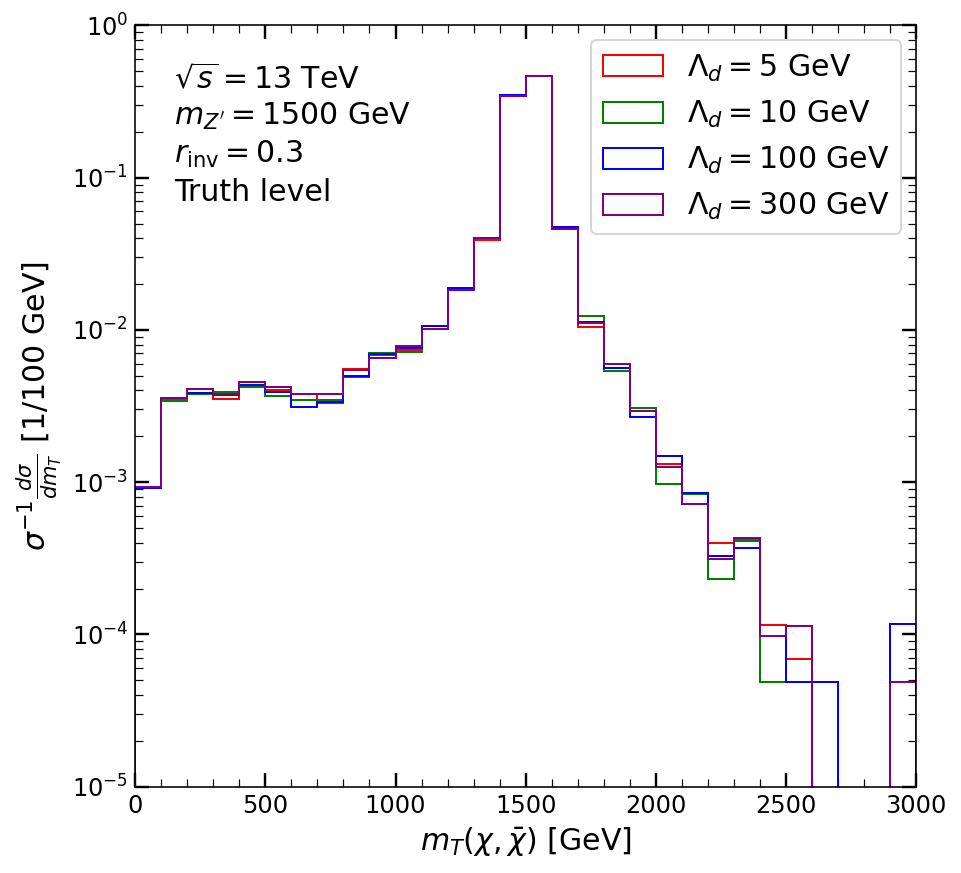

--------------------------------------------------------------------------------
Area of Lambdad [5, 10, 100, 300] = [1. 1. 1. 1.]


In [14]:
# 3. m_T(xd, xdx)
hist, bins = plotting('mT_xdxdx', [dataset[i] for i in range(0, len(dataset), 10)],
                      binning, color, label,
                      weight=weight_normalized, selected=selected_all,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$m_T(\chi, \bar{\chi})$ [GeV]',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{dm_T}$ [1/100 GeV]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, 3000), ylim=(1/100000, 1),
                      text=text_truth, text_xy=text_xy,
                      savefig='./figures_2_rinv3_varying_Lambdad/fig_03-mT_xdxdx.pdf')
print('-'*80)
print(f'Area of Lambdad {Lambdad} = {np.sum(hist, axis=1)}')

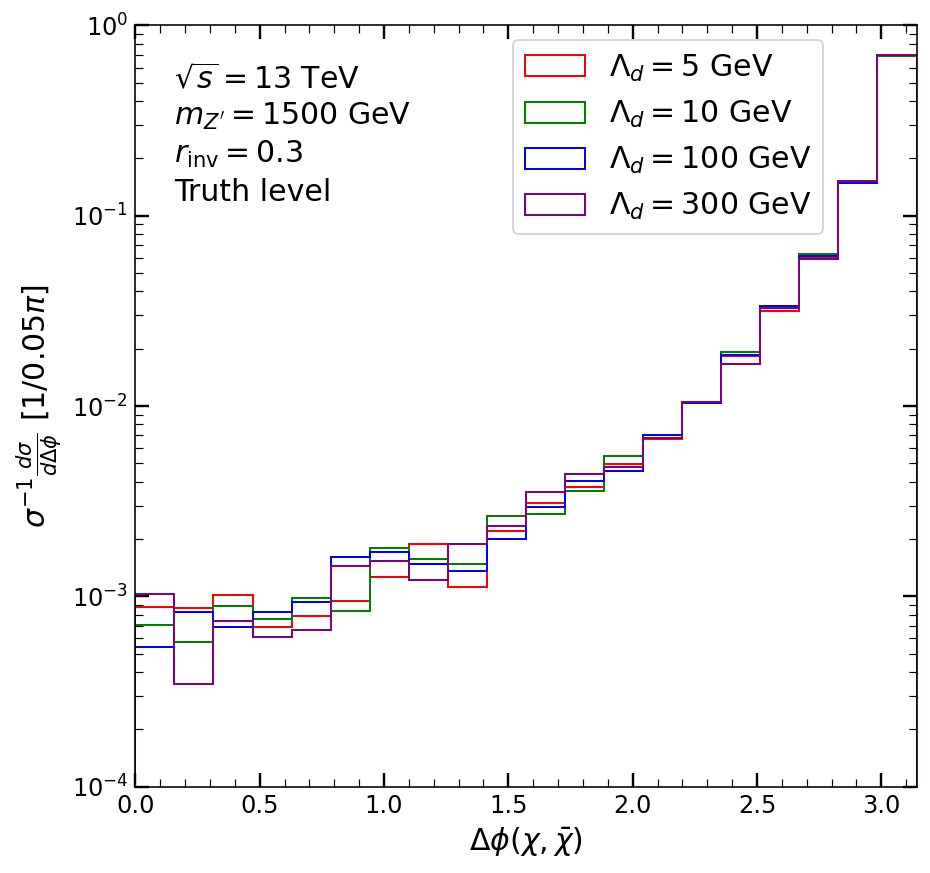

--------------------------------------------------------------------------------
Area of Lambdad [5, 10, 100, 300] = [1. 1. 1. 1.]


In [15]:
# 4. \Delta\phi(xd, xdx)
hist, bins = plotting('Dphi_xdxdx', [dataset[i] for i in range(0, len(dataset), 10)],
                      binning_phi, color, label,
                      weight=weight_normalized, selected=selected_all,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      legend_bbox_to_anchor=(0.9, 1),
                      xlabel=r'$\Delta\phi(\chi, \bar{\chi})$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\Delta\phi}$ [1/$0.05\pi$]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, np.pi), ylim=(1/10000, 1),
                      text=text_truth, text_xy=text_xy,
                      savefig='./figures_2_rinv3_varying_Lambdad/fig_04-Dphi_xdxdx.pdf')
print('-'*80)
print(f'Area of Lambdad {Lambdad} = {np.sum(hist, axis=1)}')

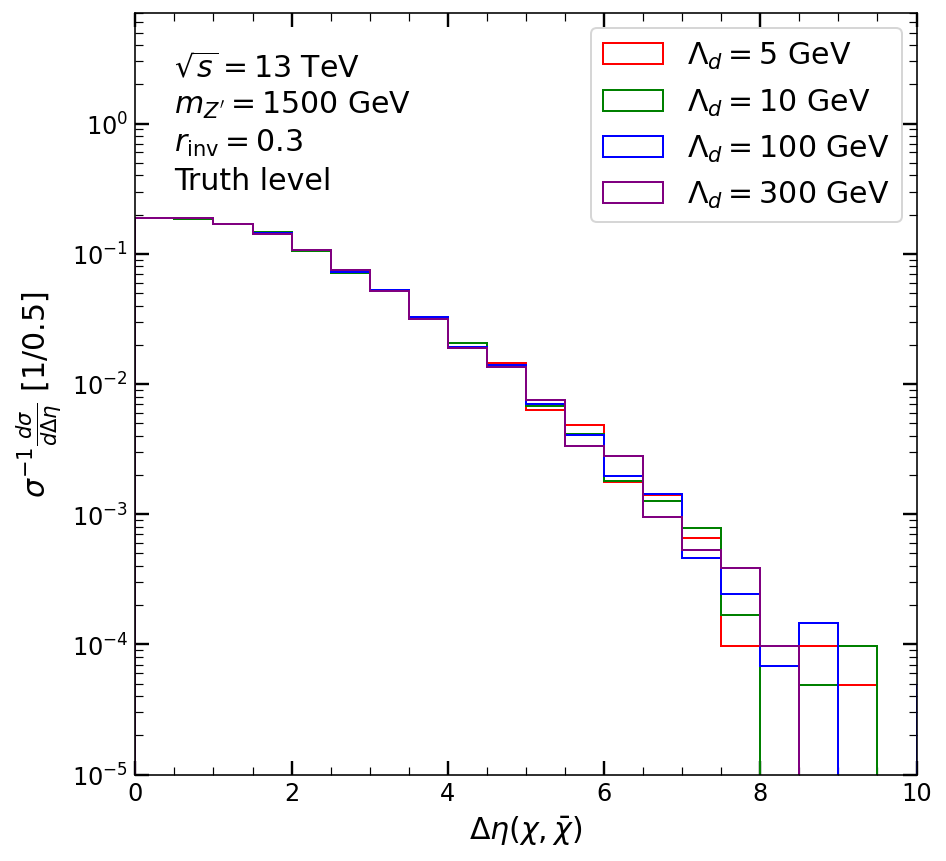

--------------------------------------------------------------------------------
Area of Lambdad [5, 10, 100, 300] = [1. 1. 1. 1.]


In [16]:
# 5. \Delta\eta(xd, xdx)
hist, bins = plotting('Deta_xdxdx', [dataset[i] for i in range(0, len(dataset), 10)],
                      np.linspace(-20, 20, 81), color, label,
                      weight=weight_normalized, selected=selected_all,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$\Delta\eta(\chi, \bar{\chi})$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\Delta\eta}$ [1/0.5]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, 10), ylim=(1/100000, 7),
                      text=text_truth, text_xy=text_xy,
                      savefig='./figures_2_rinv3_varying_Lambdad/fig_05-Deta_xdxdx.pdf')
print('-'*80)
print(f'Area of Lambdad {Lambdad} = {np.sum(hist, axis=1)}')

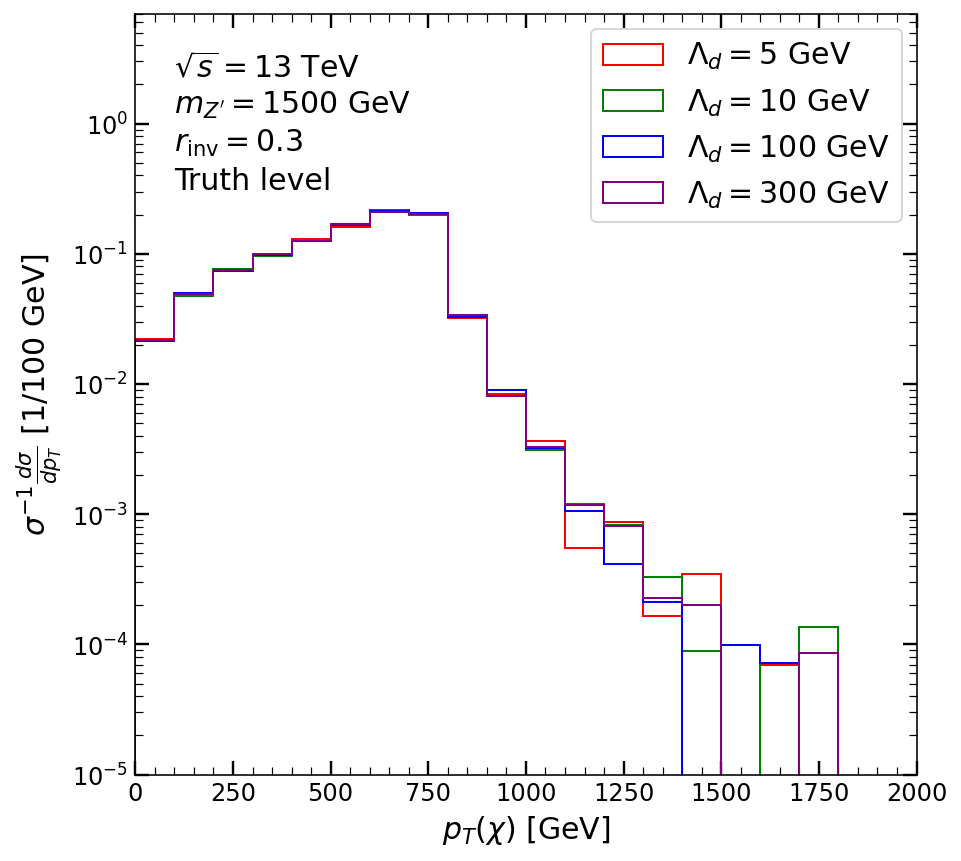

--------------------------------------------------------------------------------
Area of Lambdad [5, 10, 100, 300] = [1. 1. 1. 1.]


In [17]:
# 6. p_T(xd)
hist, bins = plotting('pT_xd', [dataset[i] for i in range(0, len(dataset), 10)],
                      binning, color, label,
                      weight=weight_normalized, selected=selected_all,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$p_T(\chi)$ [GeV]',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{dp_T}$ [1/100 GeV]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, 2000), ylim=(1/100000, 7),
                      text=text_truth, text_xy=text_xy,
                      savefig='./figures_2_rinv3_varying_Lambdad/fig_06-pT_xd.pdf')
print('-'*80)
print(f'Area of Lambdad {Lambdad} = {np.sum(hist, axis=1)}')

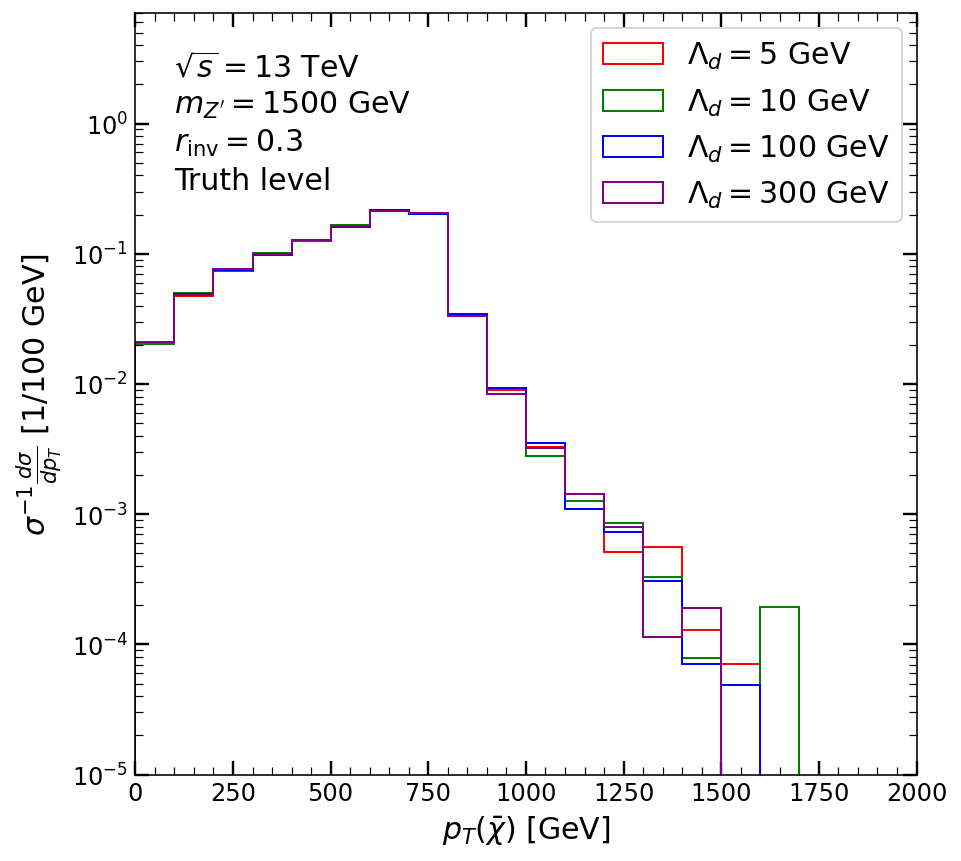

--------------------------------------------------------------------------------
Area of Lambdad [5, 10, 100, 300] = [1. 1. 1. 1.]


In [18]:
# 7. p_T(xdx)
hist, bins = plotting('pT_xdx', [dataset[i] for i in range(0, len(dataset), 10)],
                      binning, color, label,
                      weight=weight_normalized, selected=selected_all,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$p_T(\bar{\chi})$ [GeV]',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{dp_T}$ [1/100 GeV]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, 2000), ylim=(1/100000, 7),
                      text=text_truth, text_xy=text_xy,
                      savefig='./figures_2_rinv3_varying_Lambdad/fig_07-pT_xdx.pdf')
print('-'*80)
print(f'Area of Lambdad {Lambdad} = {np.sum(hist, axis=1)}')

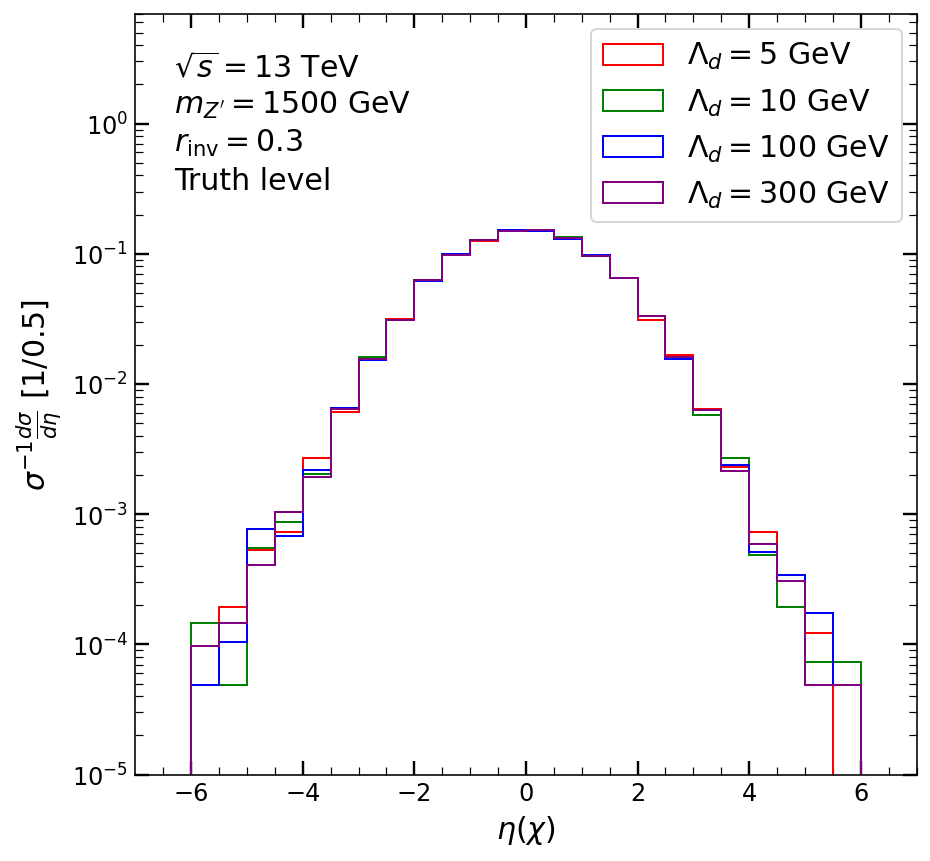

--------------------------------------------------------------------------------
Area of Lambdad [5, 10, 100, 300] = [1. 1. 1. 1.]


In [19]:
# 8. \eta(xd)
hist, bins = plotting('eta_xd', [dataset[i] for i in range(0, len(dataset), 10)],
                      binning_eta, color, label,
                      weight=weight_normalized, selected=selected_all,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$\eta(\chi)$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\eta}$ [1/0.5]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(-7, 7), ylim=(1/100000, 7),
                      text=text_truth, text_xy=text_xy,
                      savefig='./figures_2_rinv3_varying_Lambdad/fig_08-eta_xd.pdf')
print('-'*80)
print(f'Area of Lambdad {Lambdad} = {np.sum(hist, axis=1)}')

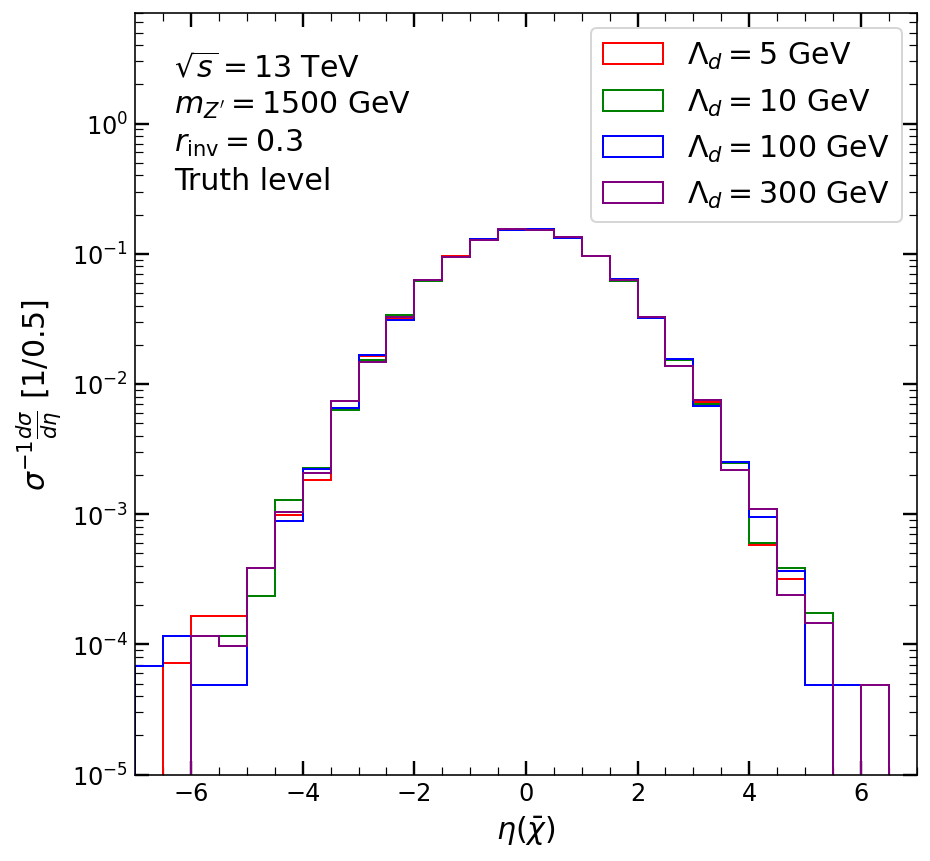

--------------------------------------------------------------------------------
Area of Lambdad [5, 10, 100, 300] = [1. 1. 1. 1.]


In [20]:
# 9. \eta(xdx)
hist, bins = plotting('eta_xdx', [dataset[i] for i in range(0, len(dataset), 10)],
                      binning_eta, color, label,
                      weight=weight_normalized, selected=selected_all,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$\eta(\bar{\chi})$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\eta}$ [1/0.5]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(-7, 7), ylim=(1/100000, 7),
                      text=text_truth, text_xy=text_xy,
                      savefig='./figures_2_rinv3_varying_Lambdad/fig_09-eta_xdx.pdf')
print('-'*80)
print(f'Area of Lambdad {Lambdad} = {np.sum(hist, axis=1)}')

### 3-2. Jet and MET in the truth level
* $N_\mathrm{jet}$
* $p_T(j_1)$, $p_T(j_2)$, $p_T(j_3)$, $p_T(j_4)$
* $\eta(j_1)$, $\eta(j_2)$, $\eta(j_3)$, $\eta(j_4)$
* $\phi(j_1)$, $\phi(j_2)$, $\phi(j_3)$, $\phi(j_4)$
* $\vec{\cancel{E}}_T$, $\phi(\vec{\cancel{E}}_T)$
* $\Delta\phi(j_1, \cancel{E}_T)$, $\Delta\phi(j_2, \cancel{E}_T)$, 
$\Delta\phi(j_3, \cancel{E}_T)$, $\Delta\phi(j_4, \cancel{E}_T)$
* $\min_j \left[\Delta\phi(j, \cancel{E}_T)\right]$

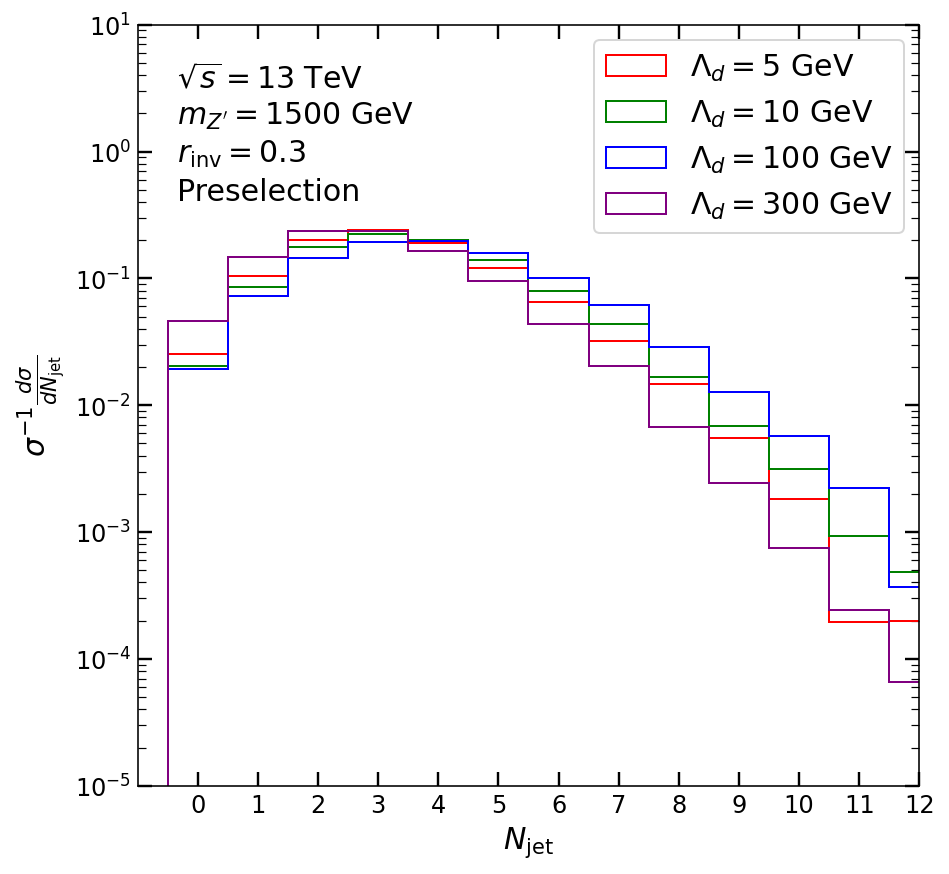

--------------------------------------------------------------------------------
Area of Lambdad [5, 10, 100, 300] = [1. 1. 1. 1.]


In [21]:
# 10. N_jet
hist, bins = plotting('N_jet', [dataset[i+2] for i in range(0, len(dataset), 10)],
                      np.linspace(0, 20, 21), color, label,
                      weight=weight_normalized, selected=selected_all,
                      align='left', where='mid',
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$N_\mathrm{jet}$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{dN_\mathrm{jet}}$',
                      yscale='log',
                      xmajor_locator=MultipleLocator(1),
                      xminor_locator=MultipleLocator(1),
                      ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(-0.99, 12), ylim=(1/100000, 10),
                      text=text, text_xy=text_xy,
                      savefig='./figures_2_rinv3_varying_Lambdad/fig_10-N_jet.pdf')
print('-'*80)
print(f'Area of Lambdad {Lambdad} = {np.sum(hist, axis=1)}')

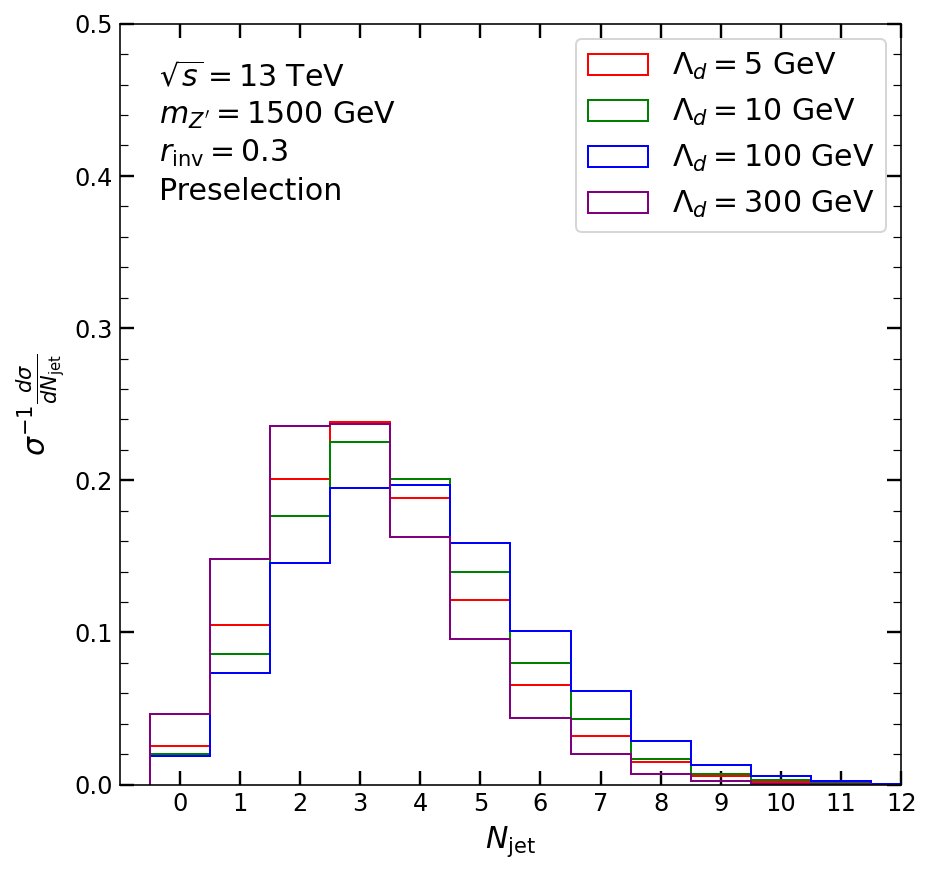

--------------------------------------------------------------------------------
Area of Lambdad [5, 10, 100, 300] = [1. 1. 1. 1.]


In [22]:
# 10. N_jet without log scale
hist, bins = plotting('N_jet', [dataset[i+2] for i in range(0, len(dataset), 10)],
                      np.linspace(0, 20, 21), color, label,
                      weight=weight_normalized, selected=selected_all,
                      align='left', where='mid',
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$N_\mathrm{jet}$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{dN_\mathrm{jet}}$',
                      xmajor_locator=MultipleLocator(1),
                      xminor_locator=MultipleLocator(1),
                      xlim=(-0.99, 12), ylim=(0, 0.5),
                      text=text, text_xy=text_xy,
                      savefig='./figures_2_rinv3_varying_Lambdad/fig_10-N_jet-wo_log.pdf')
print('-'*80)
print(f'Area of Lambdad {Lambdad} = {np.sum(hist, axis=1)}')

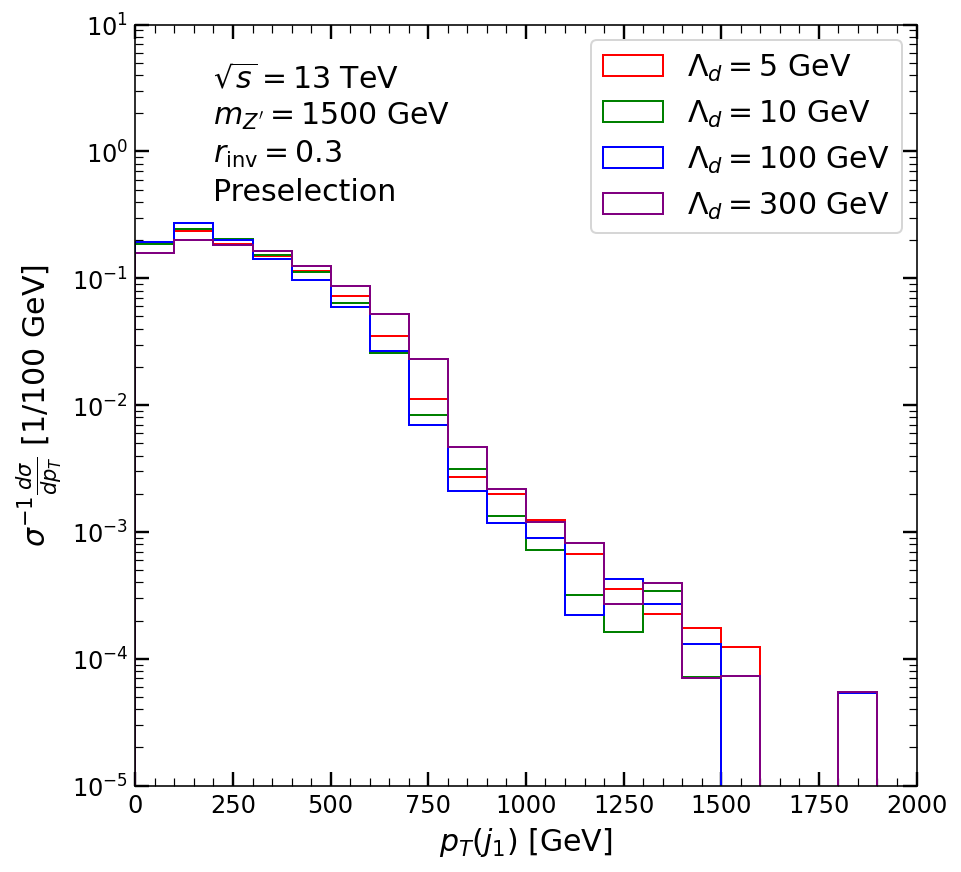

--------------------------------------------------------------------------------
Area of Lambdad [5, 10, 100, 300] = [1. 1. 1. 1.]


In [23]:
# 11. p_T(j_1)
hist, bins = plotting('pT_1', [dataset[i+2] for i in range(0, len(dataset), 10)],
                      binning, color, label,
                      weight=weight_j1_norm1, selected=selected_all,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$p_T(j_1)$ [GeV]',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{dp_T}$ [1/100 GeV]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, 2000), ylim=(1/100000, 10),
                      text=text, text_xy=(0.1, 0.93),
                      savefig='./figures_2_rinv3_varying_Lambdad/fig_11-pT_1.pdf')
print('-'*80)
print(f'Area of Lambdad {Lambdad} = {np.sum(hist, axis=1)}')

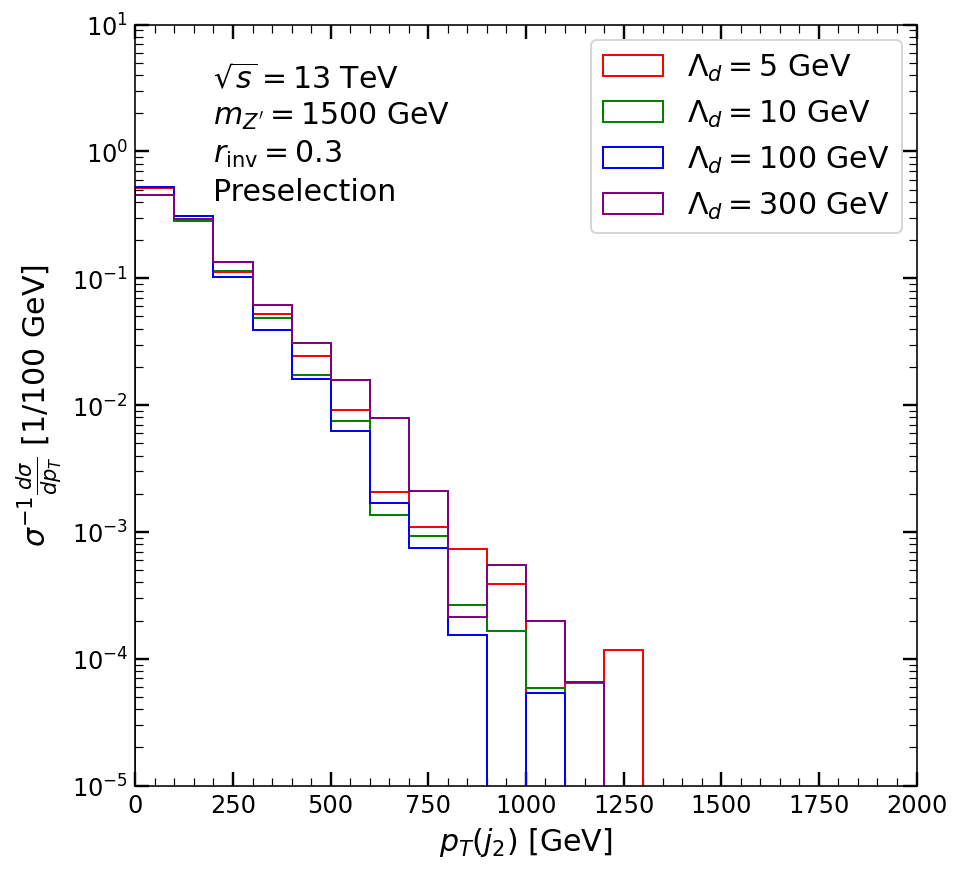

--------------------------------------------------------------------------------
Area of Lambdad [5, 10, 100, 300] = [1. 1. 1. 1.]


In [24]:
# 12. p_T(j_2)
hist, bins = plotting('pT_2', [dataset[i+2] for i in range(0, len(dataset), 10)],
                      binning, color, label,
                      weight=weight_j2_norm1, selected=selected_all,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$p_T(j_2)$ [GeV]',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{dp_T}$ [1/100 GeV]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, 2000), ylim=(1/100000, 10),
                      text=text, text_xy=(0.1, 0.93),
                      savefig='./figures_2_rinv3_varying_Lambdad/fig_12-pT_2.pdf')
print('-'*80)
print(f'Area of Lambdad {Lambdad} = {np.sum(hist, axis=1)}')

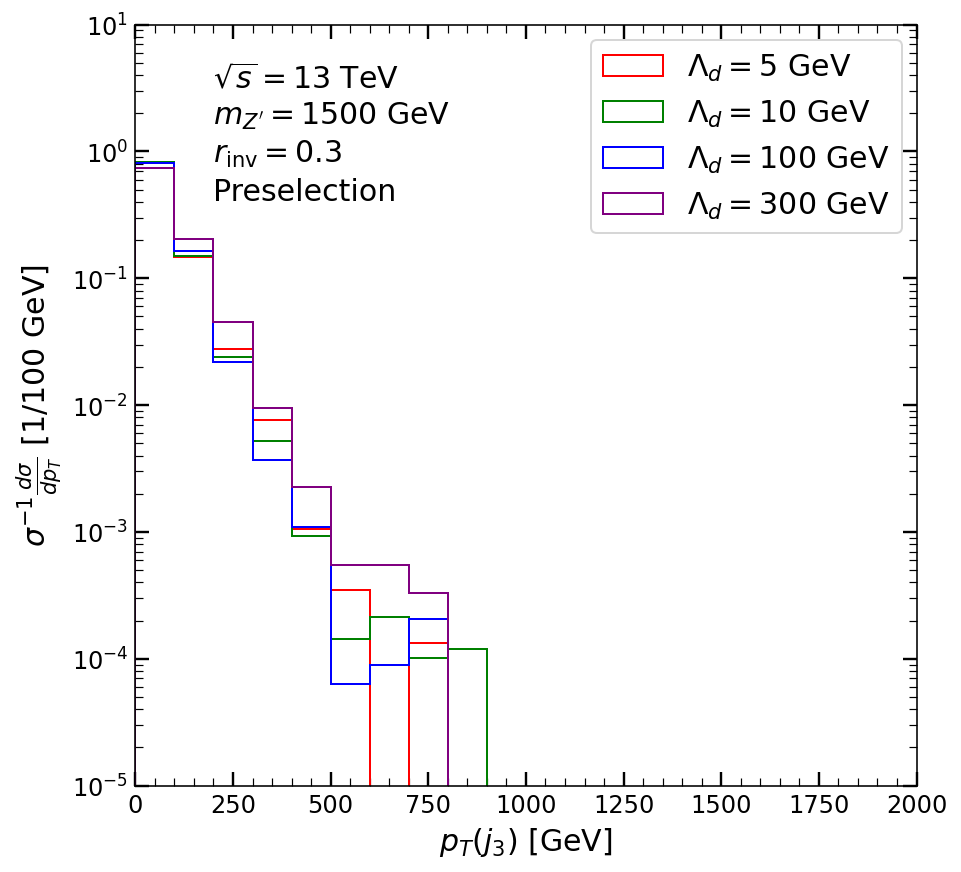

--------------------------------------------------------------------------------
Area of Lambdad [5, 10, 100, 300] = [1. 1. 1. 1.]


In [25]:
# 13. p_T(j_3)
hist, bins = plotting('pT_3', [dataset[i+2] for i in range(0, len(dataset), 10)],
                      binning, color, label,
                      weight=weight_j3_norm1, selected=selected_all,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$p_T(j_3)$ [GeV]',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{dp_T}$ [1/100 GeV]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, 2000), ylim=(1/100000, 10),
                      text=text, text_xy=(0.1, 0.93),
                      savefig='./figures_2_rinv3_varying_Lambdad/fig_13-pT_3.pdf')
print('-'*80)
print(f'Area of Lambdad {Lambdad} = {np.sum(hist, axis=1)}')

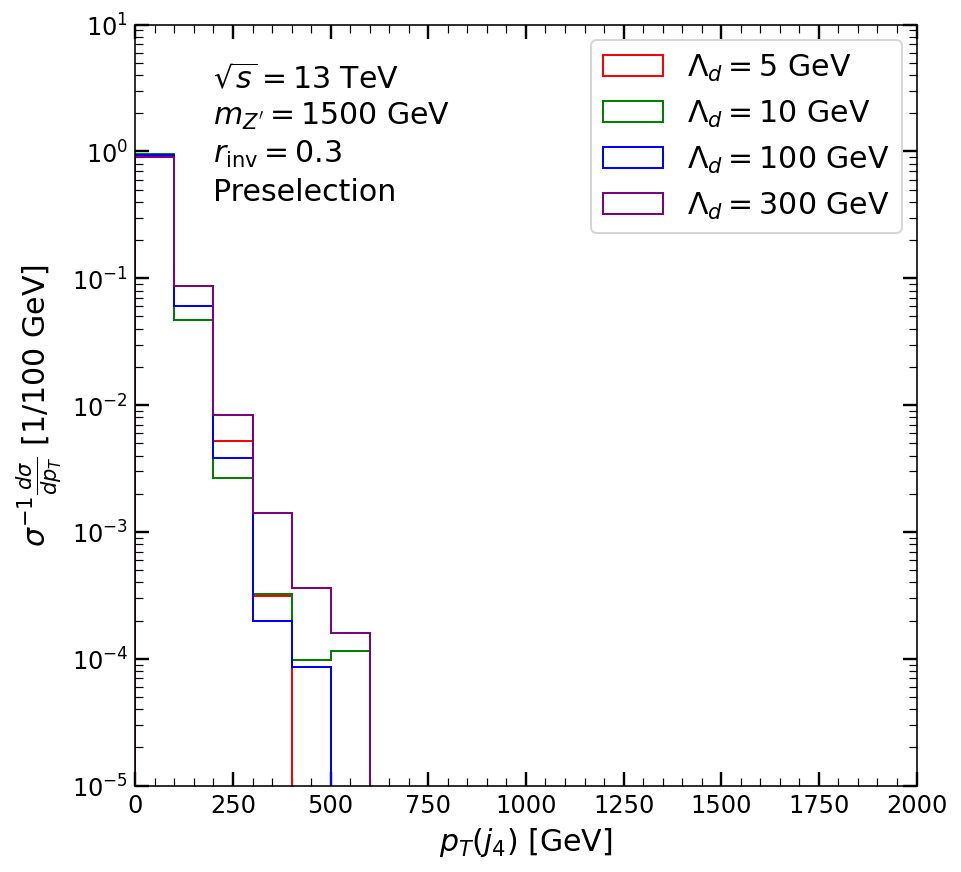

--------------------------------------------------------------------------------
Area of Lambdad [5, 10, 100, 300] = [1. 1. 1. 1.]


In [26]:
# 14. p_T(j_4)
hist, bins = plotting('pT_4', [dataset[i+2] for i in range(0, len(dataset), 10)],
                      binning, color, label,
                      weight=weight_j4_norm1, selected=selected_all,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$p_T(j_4)$ [GeV]',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{dp_T}$ [1/100 GeV]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, 2000), ylim=(1/100000, 10),
                      text=text, text_xy=(0.1, 0.93),
                      savefig='./figures_2_rinv3_varying_Lambdad/fig_14-pT_4.pdf')
print('-'*80)
print(f'Area of Lambdad {Lambdad} = {np.sum(hist, axis=1)}')

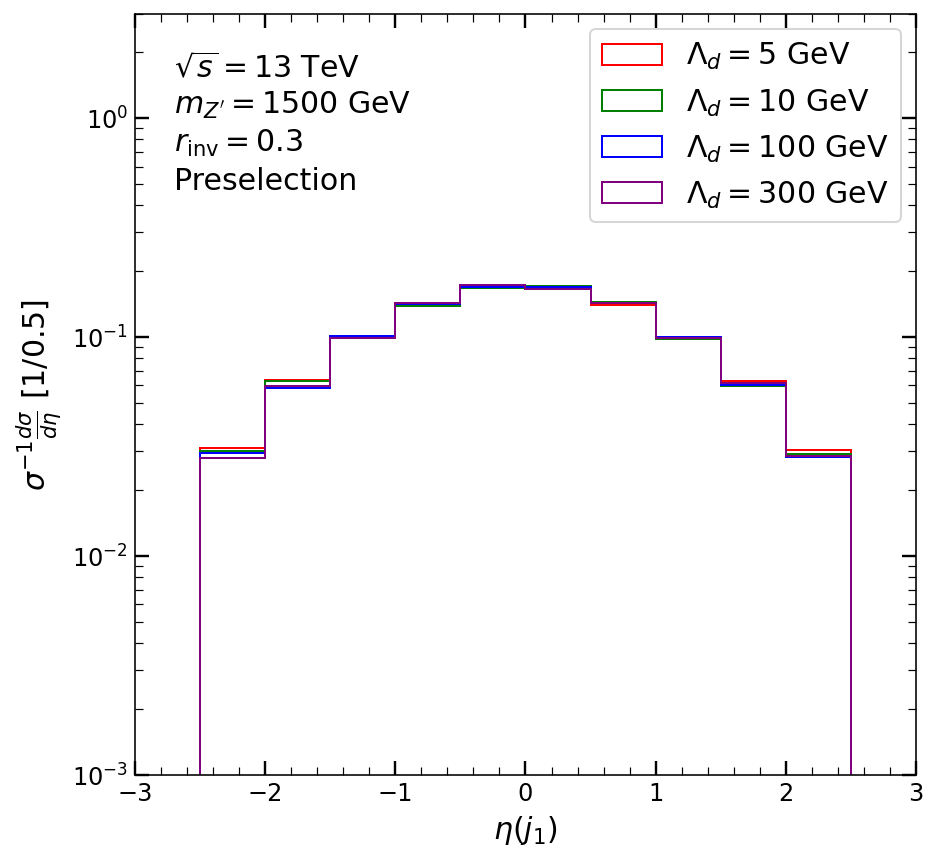

--------------------------------------------------------------------------------
Area of Lambdad [5, 10, 100, 300] = [1. 1. 1. 1.]


In [27]:
# 15. \eta(j_1)
hist, bins = plotting('eta_1', [dataset[i+2] for i in range(0, len(dataset), 10)],
                      binning_eta, color, label,
                      weight=weight_j1_norm1, selected=selected_all,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$\eta(j_1)$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\eta}$ [1/0.5]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(-3, 3), ylim=(1/1000, 3),
                      text=text, text_xy=text_xy,
                      savefig='./figures_2_rinv3_varying_Lambdad/fig_15-eta_1.pdf')
print('-'*80)
print(f'Area of Lambdad {Lambdad} = {np.sum(hist, axis=1)}')

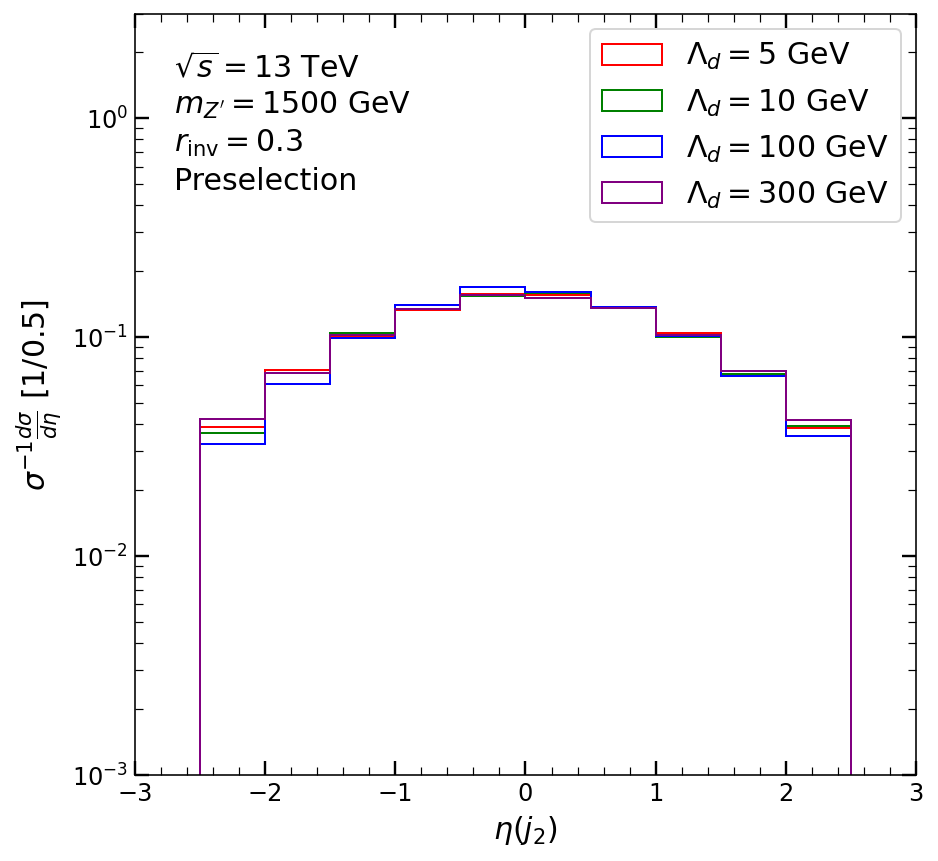

--------------------------------------------------------------------------------
Area of Lambdad [5, 10, 100, 300] = [1. 1. 1. 1.]


In [28]:
# 16. \eta(j_2)
hist, bins = plotting('eta_2', [dataset[i+2] for i in range(0, len(dataset), 10)],
                      binning_eta, color, label,
                      weight=weight_j2_norm1, selected=selected_all,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$\eta(j_2)$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\eta}$ [1/0.5]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(-3, 3), ylim=(1/1000, 3),
                      text=text, text_xy=text_xy,
                      savefig='./figures_2_rinv3_varying_Lambdad/fig_16-eta_2.pdf')
print('-'*80)
print(f'Area of Lambdad {Lambdad} = {np.sum(hist, axis=1)}')

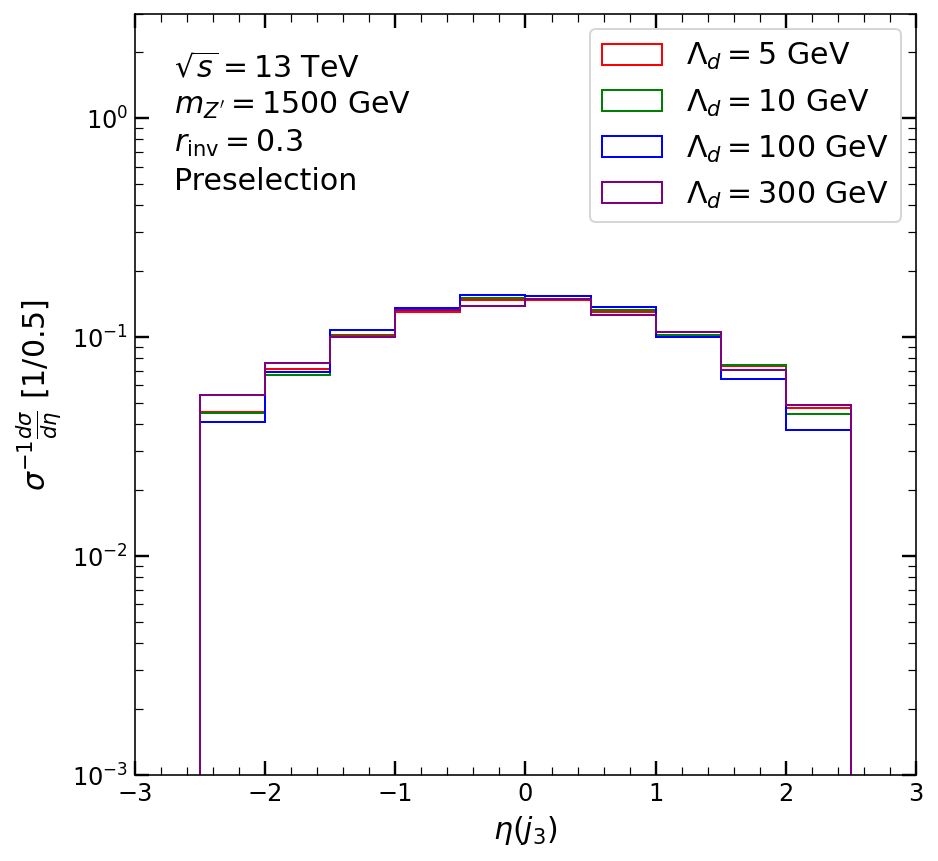

--------------------------------------------------------------------------------
Area of Lambdad [5, 10, 100, 300] = [1. 1. 1. 1.]


In [29]:
# 17. \eta(j_3)
hist, bins = plotting('eta_3', [dataset[i+2] for i in range(0, len(dataset), 10)],
                      binning_eta, color, label,
                      weight=weight_j3_norm1, selected=selected_all,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$\eta(j_3)$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\eta}$ [1/0.5]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(-3, 3), ylim=(1/1000, 3),
                      text=text, text_xy=text_xy,
                      savefig='./figures_2_rinv3_varying_Lambdad/fig_17-eta_3.pdf')
print('-'*80)
print(f'Area of Lambdad {Lambdad} = {np.sum(hist, axis=1)}')

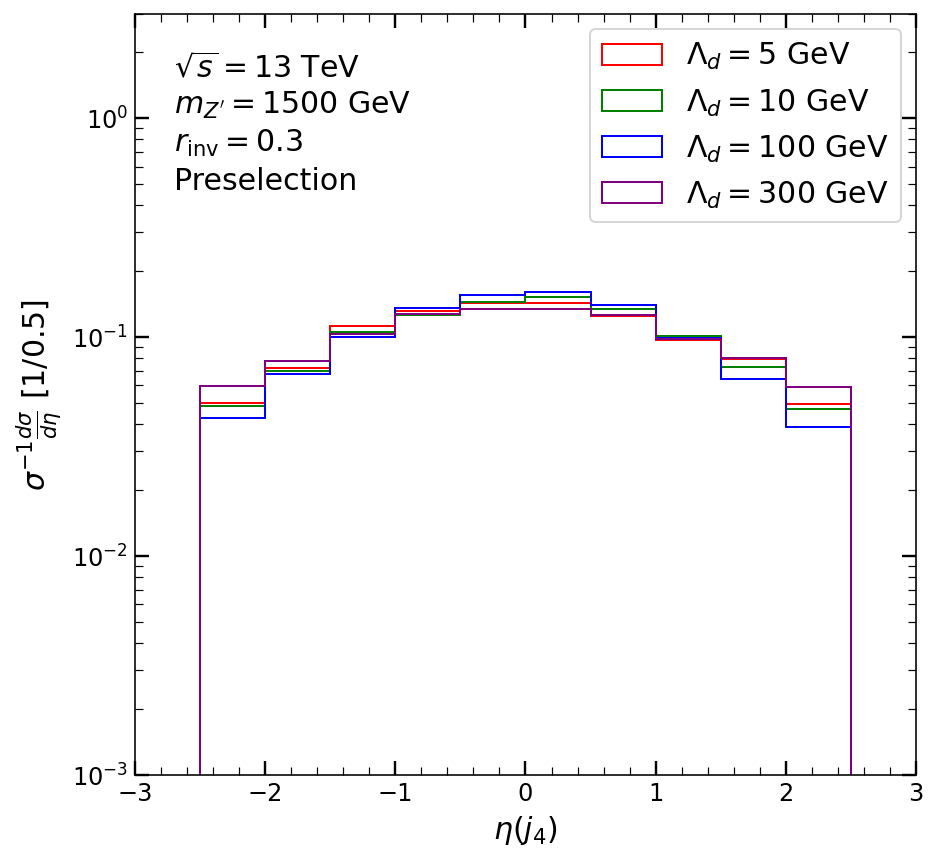

--------------------------------------------------------------------------------
Area of Lambdad [5, 10, 100, 300] = [1. 1. 1. 1.]


In [30]:
# 18. \eta(j_4)
hist, bins = plotting('eta_4', [dataset[i+2] for i in range(0, len(dataset), 10)],
                      binning_eta, color, label,
                      weight=weight_j4_norm1, selected=selected_all,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$\eta(j_4)$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\eta}$ [1/0.5]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(-3, 3), ylim=(1/1000, 3),
                      text=text, text_xy=text_xy,
                      savefig='./figures_2_rinv3_varying_Lambdad/fig_18-eta_4.pdf')
print('-'*80)
print(f'Area of Lambdad {Lambdad} = {np.sum(hist, axis=1)}')

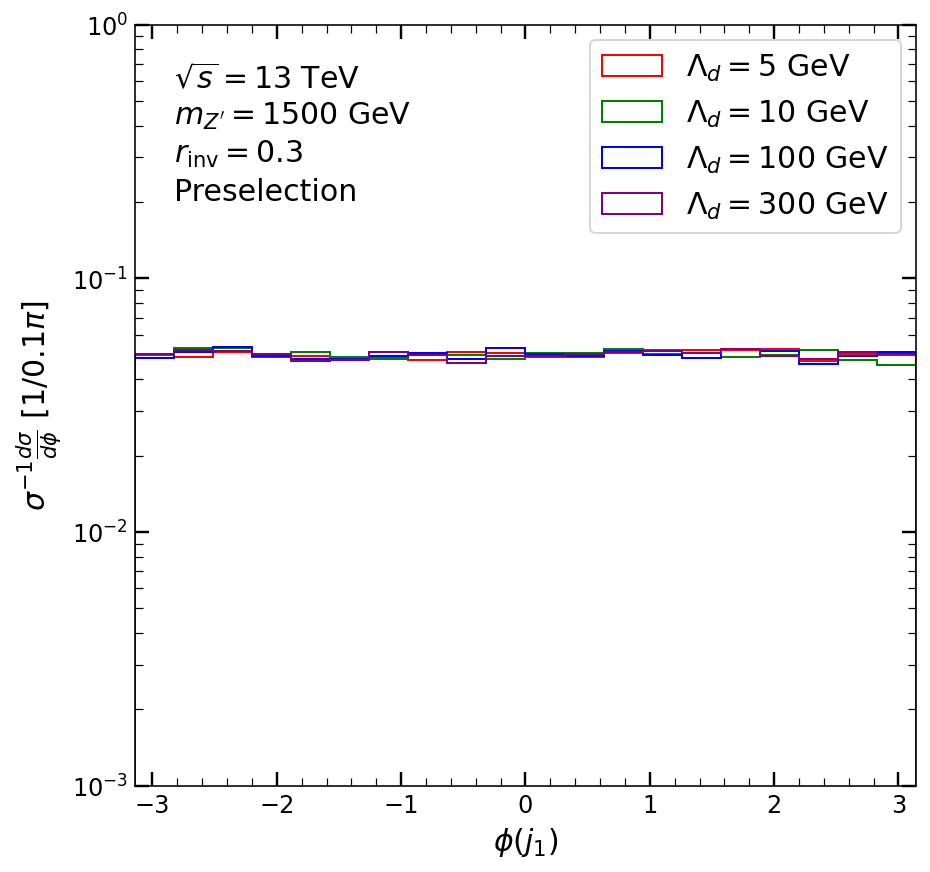

--------------------------------------------------------------------------------
Area of Lambdad [5, 10, 100, 300] = [1. 1. 1. 1.]


In [31]:
# 19. \phi(j_1)
hist, bins = plotting('phi_1', [dataset[i+2] for i in range(0, len(dataset), 10)],
                      binning_pm_phi, color, label,
                      weight=weight_j1_norm1, selected=selected_all,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$\phi(j_1)$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\phi}$ [1/$0.1\pi$]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(-np.pi, np.pi), ylim=(1/1000, 1),
                      text=text, text_xy=text_xy,
                      savefig='./figures_2_rinv3_varying_Lambdad/fig_19-phi_1.pdf')
print('-'*80)
print(f'Area of Lambdad {Lambdad} = {np.sum(hist, axis=1)}')

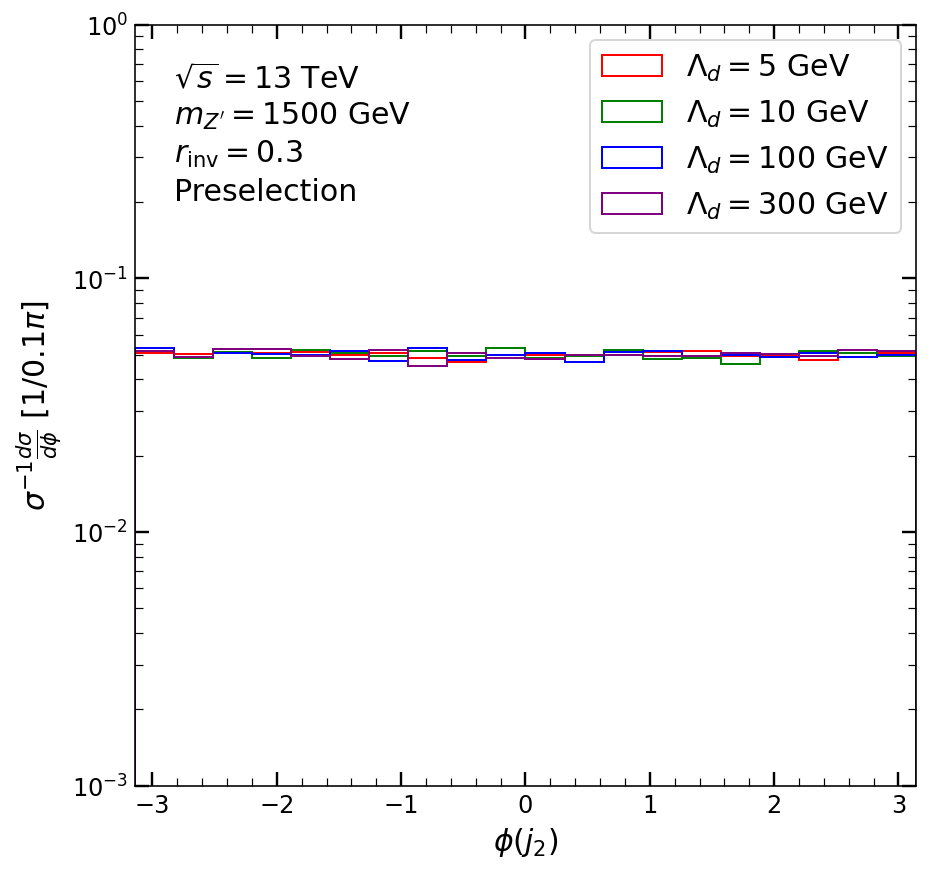

--------------------------------------------------------------------------------
Area of Lambdad [5, 10, 100, 300] = [1. 1. 1. 1.]


In [32]:
# 20. \phi(j_2)
hist, bins = plotting('phi_2', [dataset[i+2] for i in range(0, len(dataset), 10)],
                      binning_pm_phi, color, label,
                      weight=weight_j2_norm1, selected=selected_all,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$\phi(j_2)$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\phi}$ [1/$0.1\pi$]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(-np.pi, np.pi), ylim=(1/1000, 1),
                      text=text, text_xy=text_xy,
                      savefig='./figures_2_rinv3_varying_Lambdad/fig_20-phi_2.pdf')
print('-'*80)
print(f'Area of Lambdad {Lambdad} = {np.sum(hist, axis=1)}')

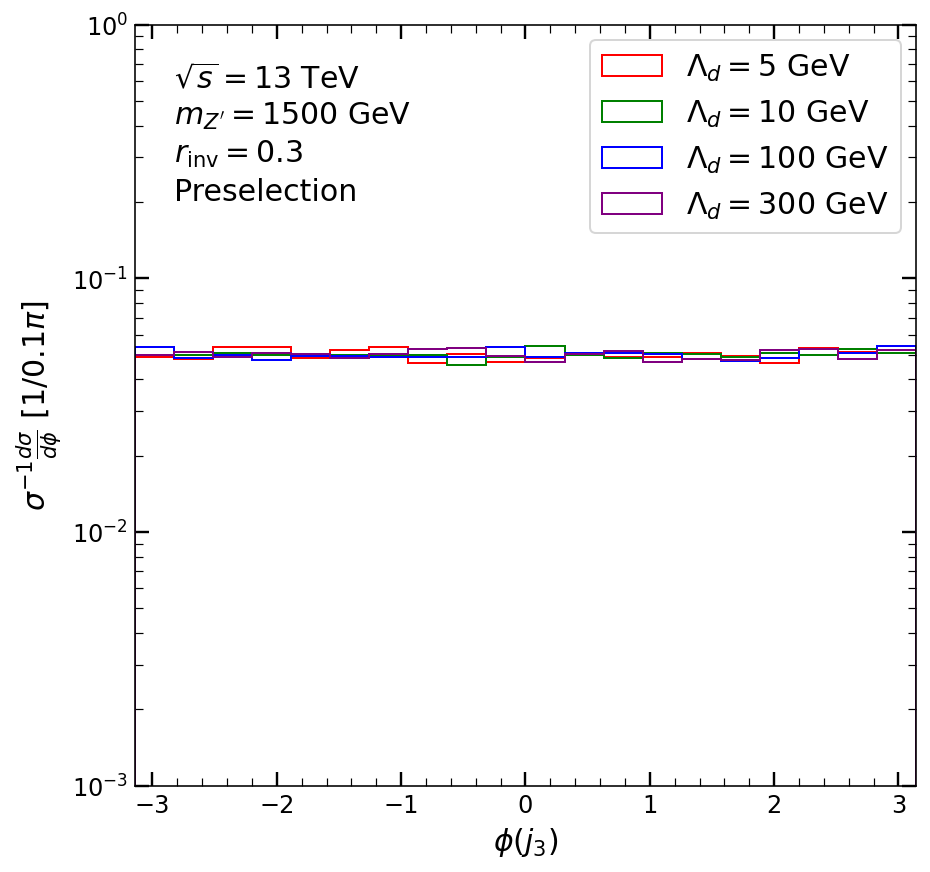

--------------------------------------------------------------------------------
Area of Lambdad [5, 10, 100, 300] = [1. 1. 1. 1.]


In [33]:
# 21. \phi(j_3)
hist, bins = plotting('phi_3', [dataset[i+2] for i in range(0, len(dataset), 10)],
                      binning_pm_phi, color, label,
                      weight=weight_j3_norm1, selected=selected_all,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$\phi(j_3)$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\phi}$ [1/$0.1\pi$]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(-np.pi, np.pi), ylim=(1/1000, 1),
                      text=text, text_xy=text_xy,
                      savefig='./figures_2_rinv3_varying_Lambdad/fig_21-phi_3.pdf')
print('-'*80)
print(f'Area of Lambdad {Lambdad} = {np.sum(hist, axis=1)}')

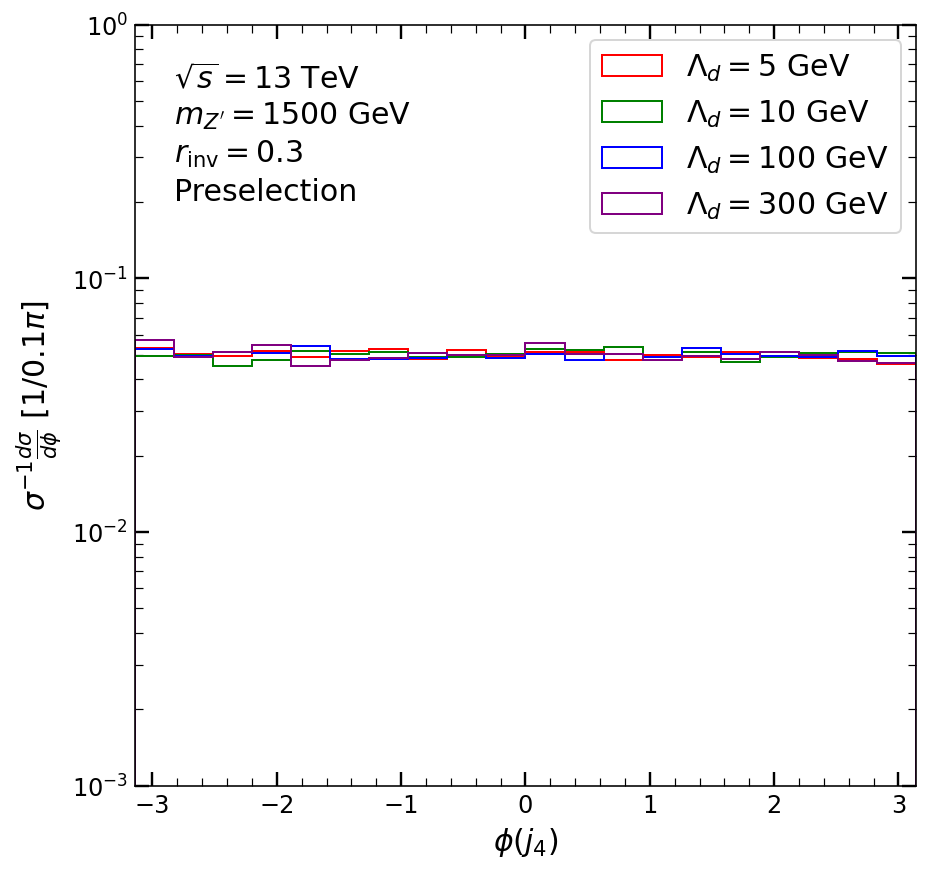

--------------------------------------------------------------------------------
Area of Lambdad [5, 10, 100, 300] = [1. 1. 1. 1.]


In [34]:
# 22. \phi(j_4)
hist, bins = plotting('phi_4', [dataset[i+2] for i in range(0, len(dataset), 10)],
                      binning_pm_phi, color, label,
                      weight=weight_j4_norm1, selected=selected_all,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$\phi(j_4)$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\phi}$ [1/$0.1\pi$]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(-np.pi, np.pi), ylim=(1/1000, 1),
                      text=text, text_xy=text_xy,
                      savefig='./figures_2_rinv3_varying_Lambdad/fig_22-phi_4.pdf')
print('-'*80)
print(f'Area of Lambdad {Lambdad} = {np.sum(hist, axis=1)}')

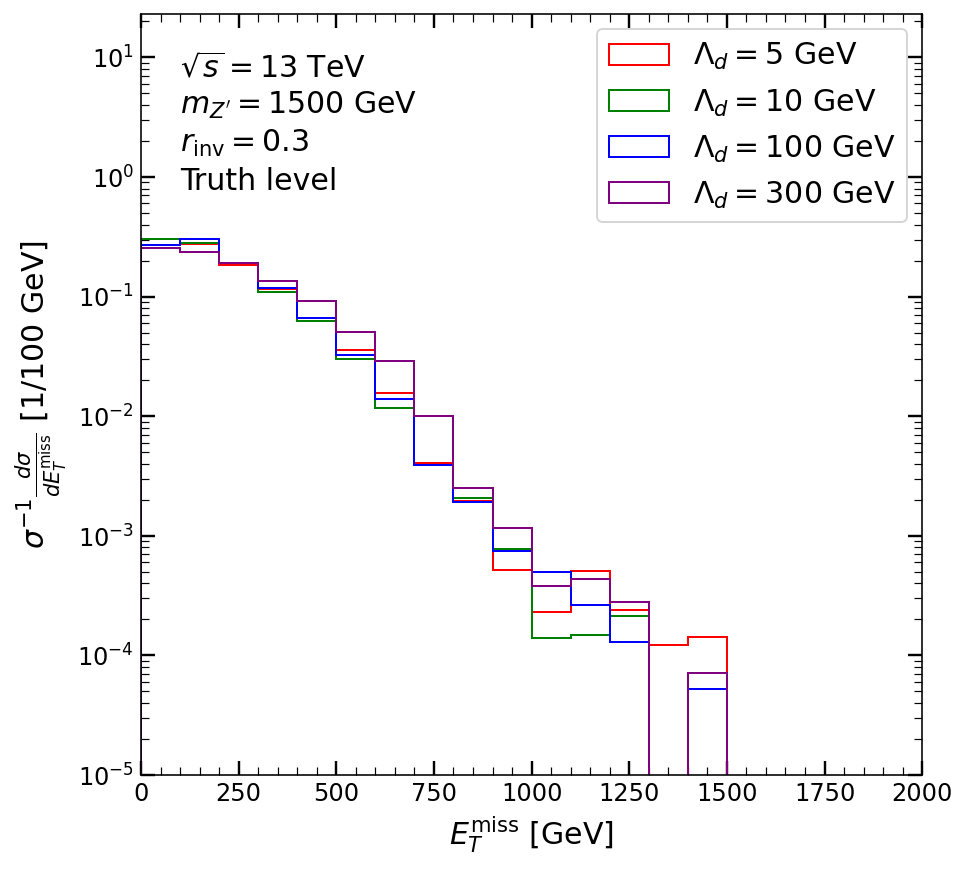

--------------------------------------------------------------------------------
Area of Lambdad [5, 10, 100, 300] = [1. 1. 1. 1.]


In [35]:
# 23. MET
hist, bins = plotting('MET', [dataset[i+3] for i in range(0, len(dataset), 10)],
                      binning, color, label,
                      weight=weight_normalized, selected=selected_all,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$E_T^\mathrm{miss}$ [GeV]',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{dE_T^\mathrm{miss}}$ [1/100 GeV]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, 2000), ylim=(1/100000, 23),
                      text=text_truth, text_xy=text_xy,
                      savefig='./figures_2_rinv3_varying_Lambdad/fig_23-MET.pdf')
print('-'*80)
print(f'Area of Lambdad {Lambdad} = {np.sum(hist, axis=1)}')

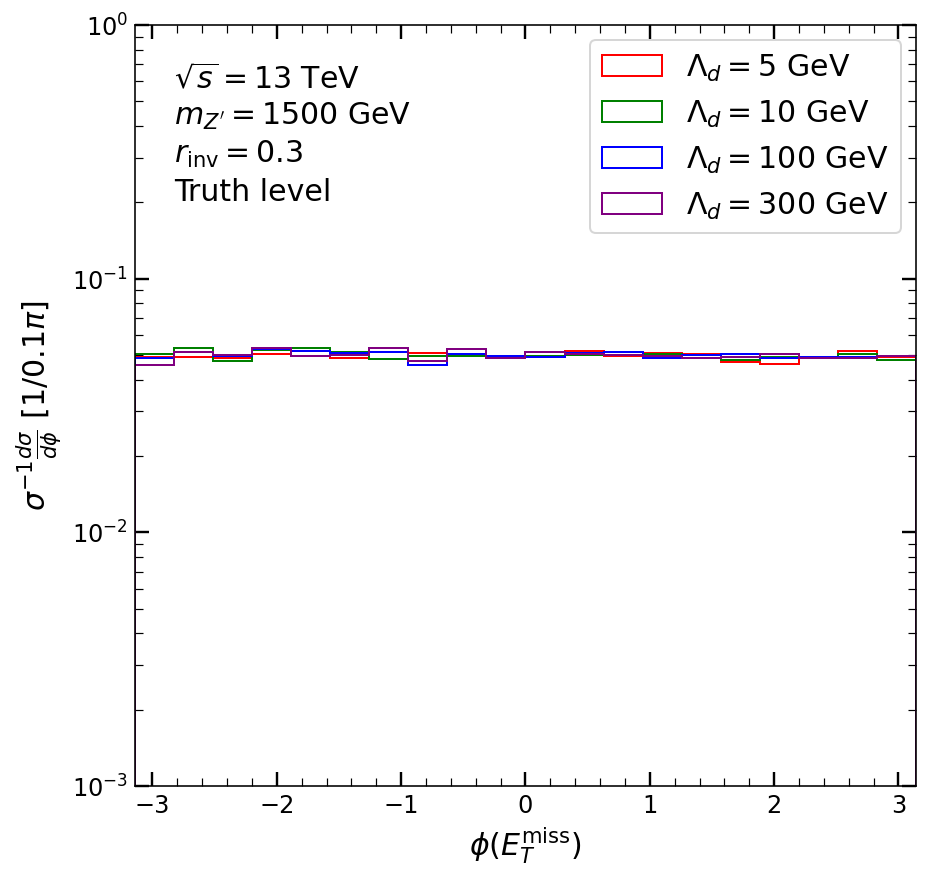

--------------------------------------------------------------------------------
Area of Lambdad [5, 10, 100, 300] = [1. 1. 1. 1.]


In [36]:
# 24. \phi(MET)
hist, bins = plotting('phi', [dataset[i+3] for i in range(0, len(dataset), 10)],
                      binning_pm_phi, color, label,
                      weight=weight_normalized, selected=selected_all,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$\phi(E_T^\mathrm{miss})$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\phi}$ [1/$0.1\pi$]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(-np.pi, np.pi), ylim=(1/1000, 1),
                      text=text_truth, text_xy=text_xy,
                      savefig='./figures_2_rinv3_varying_Lambdad/fig_24-phi_MET.pdf')
print('-'*80)
print(f'Area of Lambdad {Lambdad} = {np.sum(hist, axis=1)}')

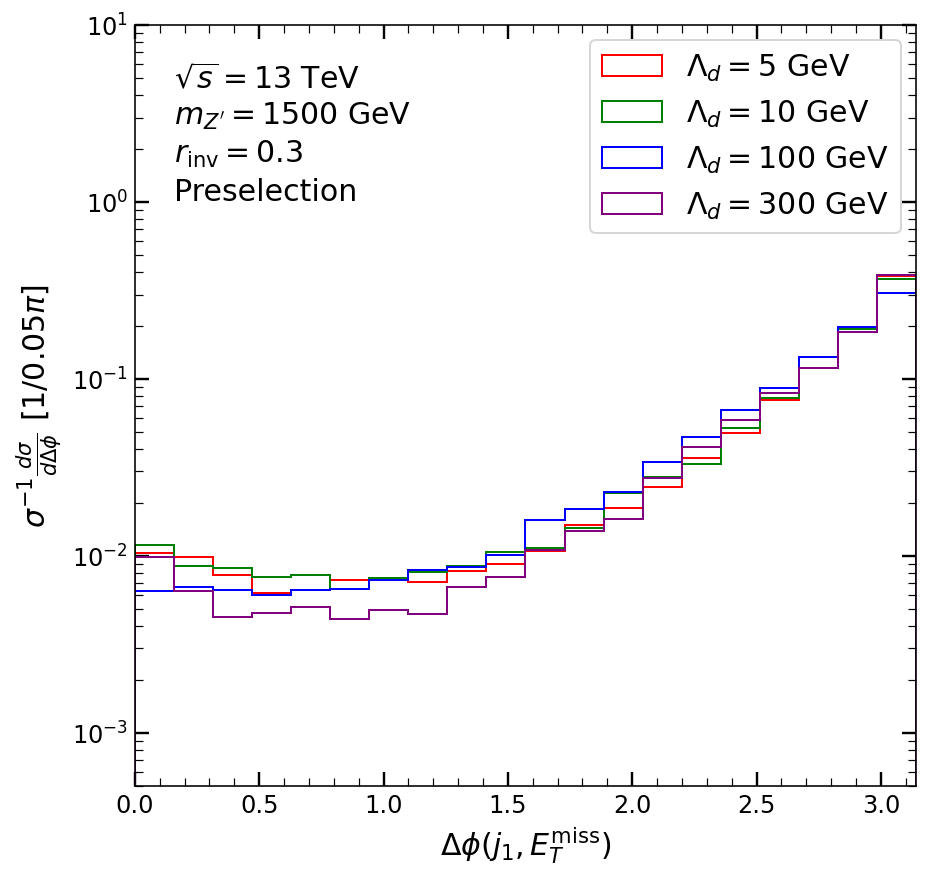

--------------------------------------------------------------------------------
Area of Lambdad [5, 10, 100, 300] = [1. 1. 1. 1.]


In [37]:
# 25. \Delta\phi(j_1, MET)
hist, bins = plotting('Dphi_j1_MET', [dataset[i+4] for i in range(0, len(dataset), 10)],
                      binning_phi, color, label,
                      weight=weight_j1_norm1, selected=selected_all,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$\Delta\phi(j_1, E_T^\mathrm{miss})$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\Delta\phi}$ [1/$0.05\pi$]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, np.pi), ylim=(1/2000, 10),
                      text=text, text_xy=text_xy,
                      savefig='./figures_2_rinv3_varying_Lambdad/fig_25-Dphi_j1_MET.pdf')
print('-'*80)
print(f'Area of Lambdad {Lambdad} = {np.sum(hist, axis=1)}')

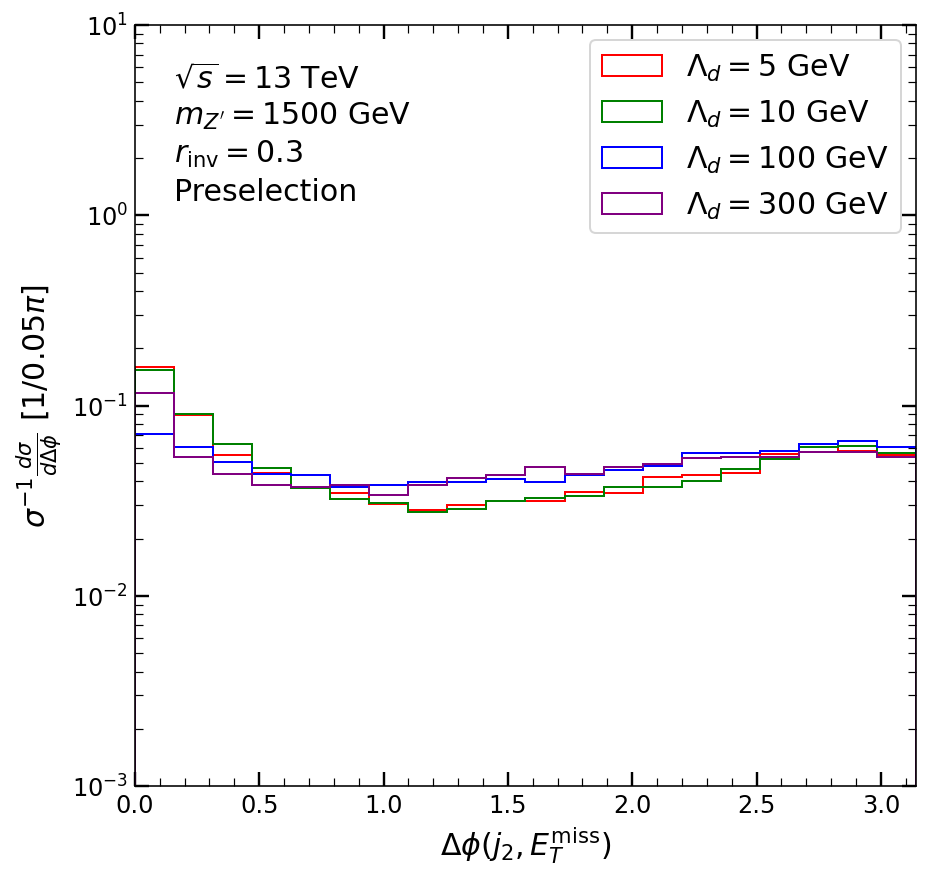

--------------------------------------------------------------------------------
Area of Lambdad [5, 10, 100, 300] = [1. 1. 1. 1.]


In [38]:
# 26. \Delta\phi(j_2, MET)
hist, bins = plotting('Dphi_j2_MET', [dataset[i+4] for i in range(0, len(dataset), 10)],
                      binning_phi, color, label,
                      weight=weight_j2_norm1, selected=selected_all,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$\Delta\phi(j_2, E_T^\mathrm{miss})$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\Delta\phi}$ [1/$0.05\pi$]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, np.pi), ylim=(1/1000, 10),
                      text=text, text_xy=text_xy,
                      savefig='./figures_2_rinv3_varying_Lambdad/fig_26-Dphi_j2_MET.pdf')
print('-'*80)
print(f'Area of Lambdad {Lambdad} = {np.sum(hist, axis=1)}')

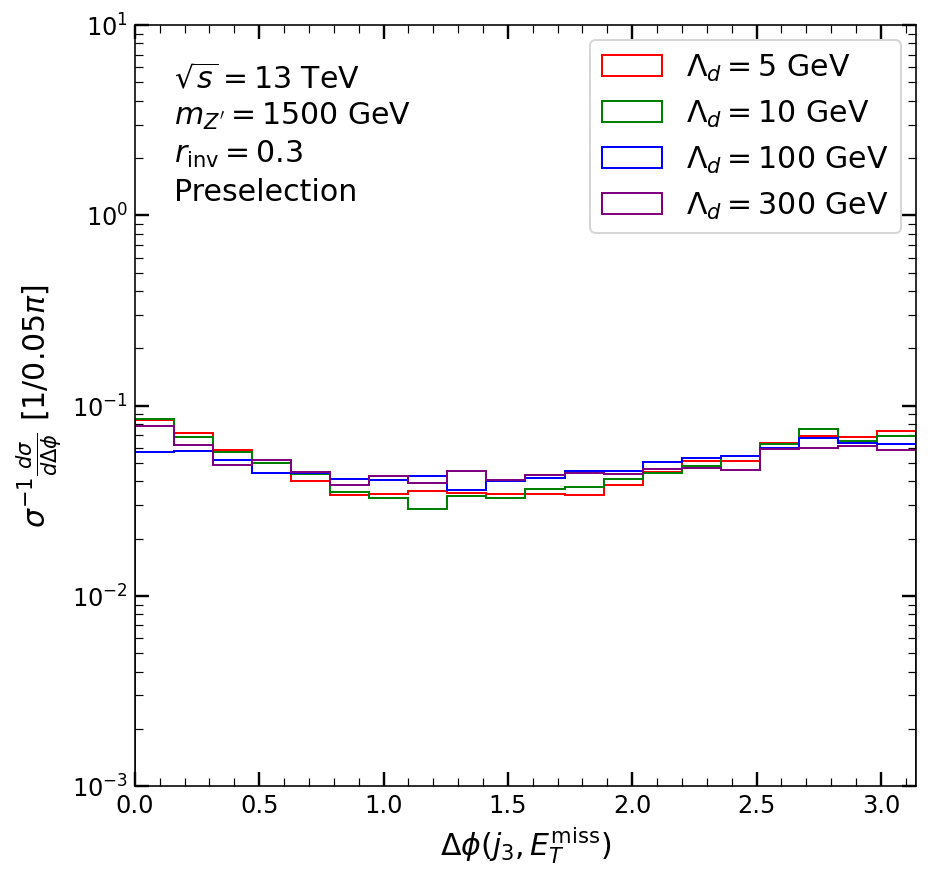

--------------------------------------------------------------------------------
Area of Lambdad [5, 10, 100, 300] = [1. 1. 1. 1.]


In [39]:
# 27. \Delta\phi(j_3, MET)
hist, bins = plotting('Dphi_j3_MET', [dataset[i+4] for i in range(0, len(dataset), 10)],
                      binning_phi, color, label,
                      weight=weight_j3_norm1, selected=selected_all,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$\Delta\phi(j_3, E_T^\mathrm{miss})$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\Delta\phi}$ [1/$0.05\pi$]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, np.pi), ylim=(1/1000, 10),
                      text=text, text_xy=text_xy,
                      savefig='./figures_2_rinv3_varying_Lambdad/fig_27-Dphi_j3_MET.pdf')
print('-'*80)
print(f'Area of Lambdad {Lambdad} = {np.sum(hist, axis=1)}')

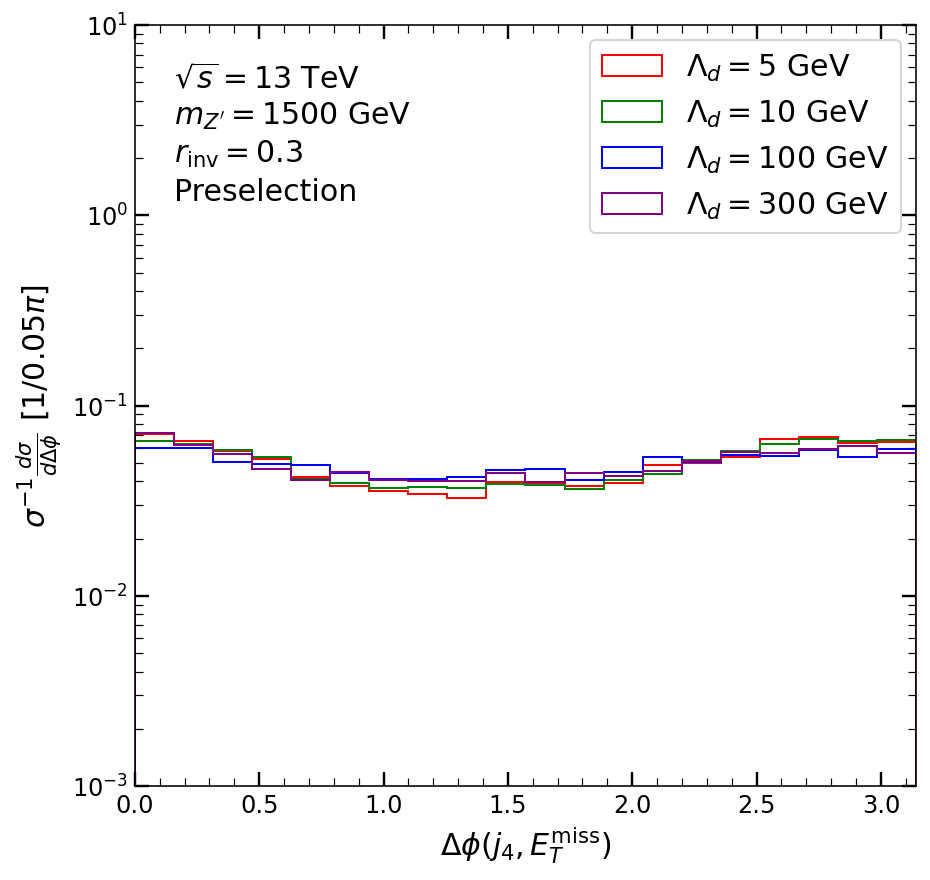

--------------------------------------------------------------------------------
Area of Lambdad [5, 10, 100, 300] = [1. 1. 1. 1.]


In [40]:
# 28. \Delta\phi(j_4, MET)
hist, bins = plotting('Dphi_j4_MET', [dataset[i+4] for i in range(0, len(dataset), 10)],
                      binning_phi, color, label,
                      weight=weight_j4_norm1, selected=selected_all,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$\Delta\phi(j_4, E_T^\mathrm{miss})$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\Delta\phi}$ [1/$0.05\pi$]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, np.pi), ylim=(1/1000, 10),
                      text=text, text_xy=text_xy,
                      savefig='./figures_2_rinv3_varying_Lambdad/fig_28-Dphi_j4_MET.pdf')
print('-'*80)
print(f'Area of Lambdad {Lambdad} = {np.sum(hist, axis=1)}')

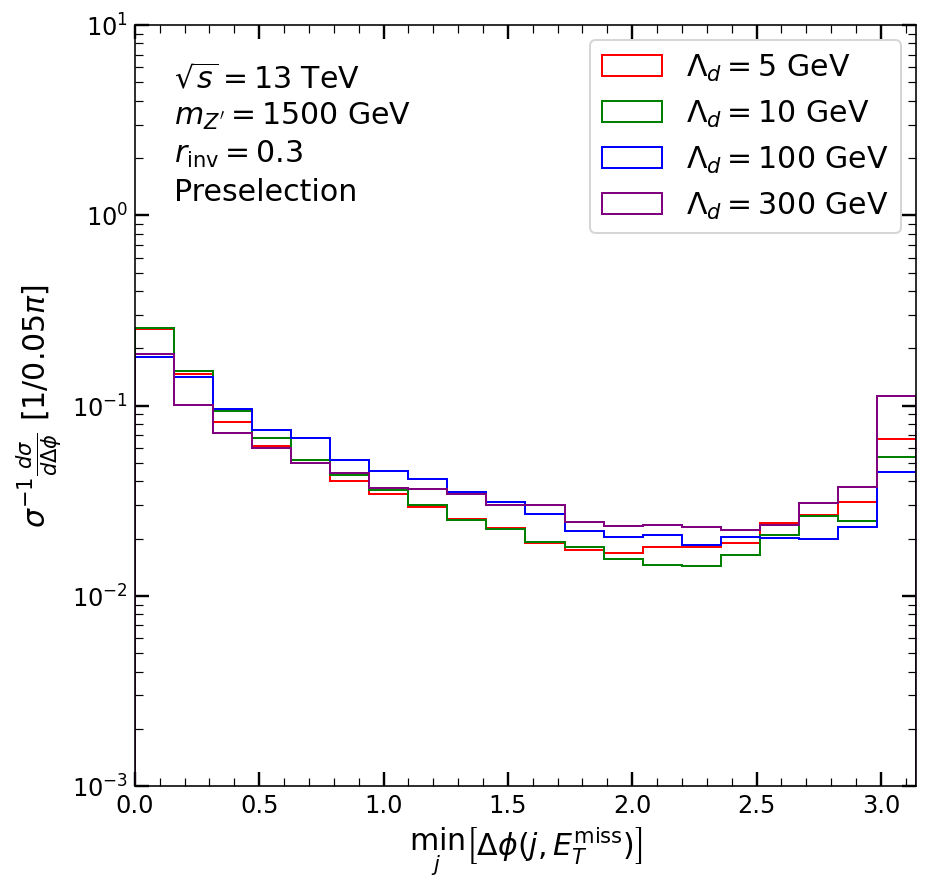

--------------------------------------------------------------------------------
Area of Lambdad [5, 10, 100, 300] = [1. 1. 1. 1.]


In [41]:
# 29. \min\Delta\phi(j, MET)
hist, bins = plotting('min_Dphi_j_MET', [dataset[i+4] for i in range(0, len(dataset), 10)],
                      binning_phi, color, label,
                      weight=weight_j1_norm1, selected=selected_all,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$\min_j\left[\Delta\phi(j, E_T^\mathrm{miss})\right]$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\Delta\phi}$ [1/$0.05\pi$]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, np.pi), ylim=(1/1000, 10),
                      text=text, text_xy=text_xy,
                      savefig='./figures_2_rinv3_varying_Lambdad/fig_29-min_Dphi_j_MET.pdf')
print('-'*80)
print(f'Area of Lambdad {Lambdad} = {np.sum(hist, axis=1)}')

### 3-3. Event selection $N_\mathrm{jet} \ge 2$

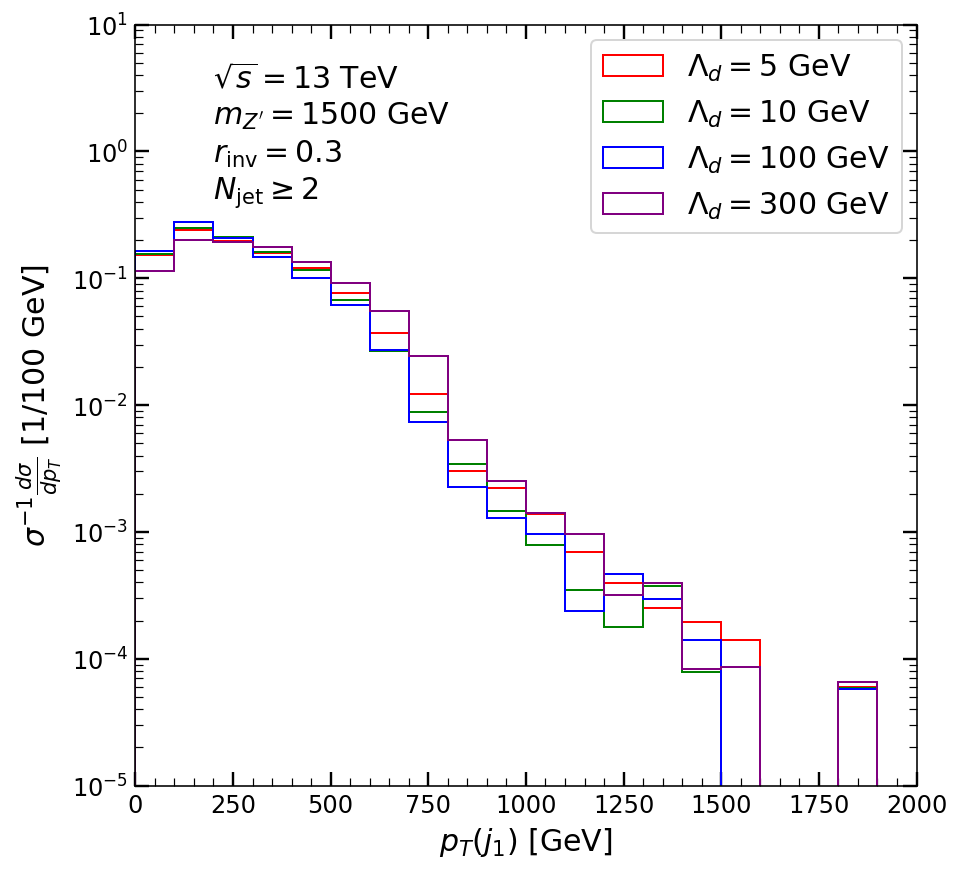

--------------------------------------------------------------------------------
Area of Lambdad [5, 10, 100, 300] = [1. 1. 1. 1.]


In [42]:
# 30. p_T(j_1) when N_jet >= 2
hist, bins = plotting('pT_1', [dataset[i+6] for i in range(0, len(dataset), 10)],
                      binning, color, label,
                      weight=weight_jj_norm1, selected=selected_jj,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$p_T(j_1)$ [GeV]',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{dp_T}$ [1/100 GeV]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, 2000), ylim=(1/100000, 10),
                      text=text_Njet2, text_xy=(0.1, 0.93),
                      savefig='./figures_2_rinv3_varying_Lambdad/fig_30-dijet-pT_1.pdf')
print('-'*80)
print(f'Area of Lambdad {Lambdad} = {np.sum(hist, axis=1)}')

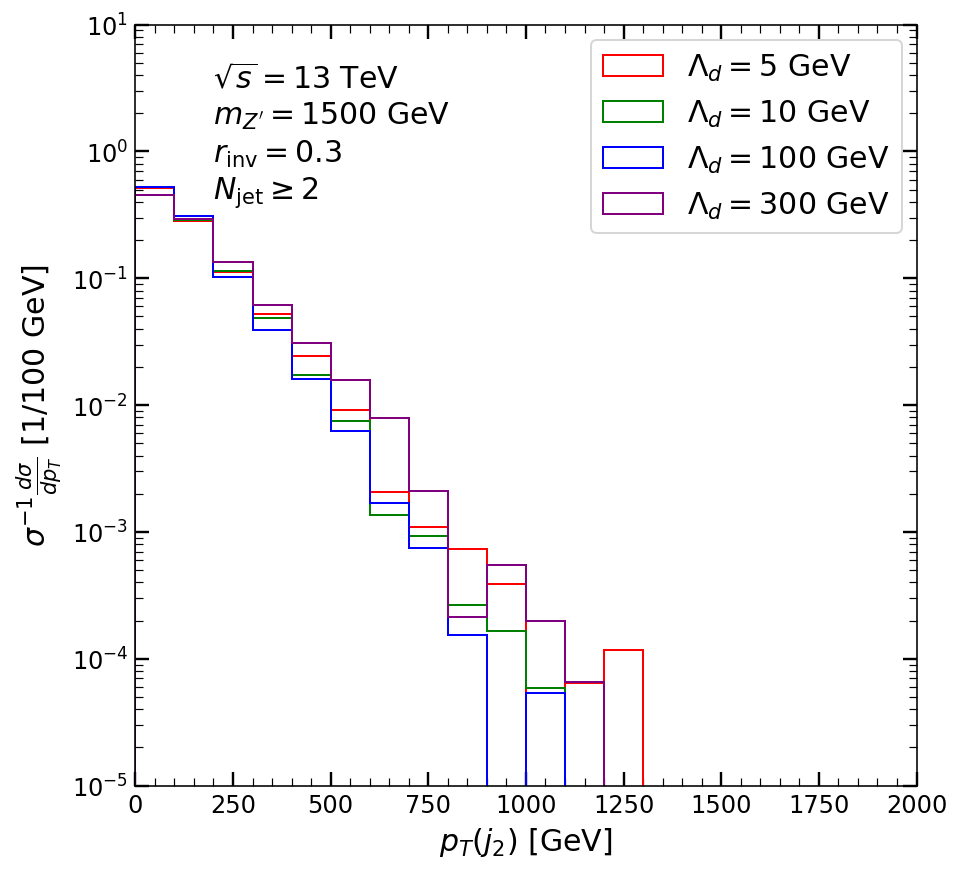

--------------------------------------------------------------------------------
Area of Lambdad [5, 10, 100, 300] = [1. 1. 1. 1.]


In [43]:
# 31. p_T(j_2) when N_jet >= 2
hist, bins = plotting('pT_2', [dataset[i+6] for i in range(0, len(dataset), 10)],
                      binning, color, label,
                      weight=weight_jj_norm1, selected=selected_jj,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$p_T(j_2)$ [GeV]',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{dp_T}$ [1/100 GeV]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, 2000), ylim=(1/100000, 10),
                      text=text_Njet2, text_xy=(0.1, 0.93),
                      savefig='./figures_2_rinv3_varying_Lambdad/fig_31-dijet-pT_2.pdf')
print('-'*80)
print(f'Area of Lambdad {Lambdad} = {np.sum(hist, axis=1)}')

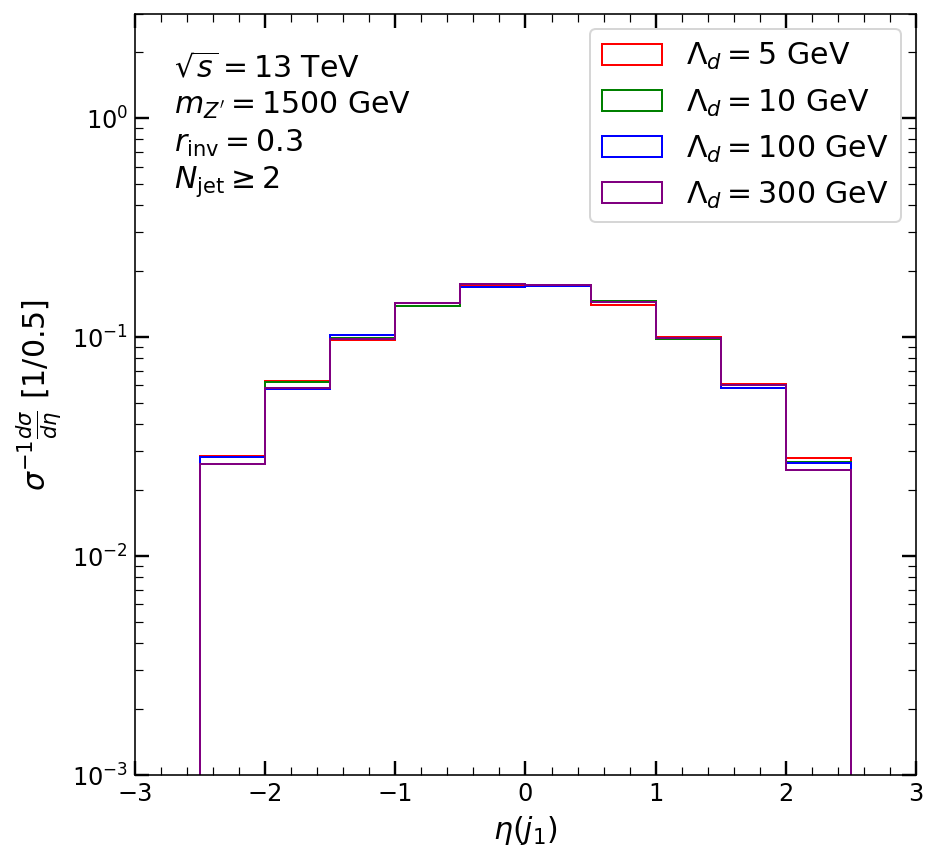

--------------------------------------------------------------------------------
Area of Lambdad [5, 10, 100, 300] = [1. 1. 1. 1.]


In [44]:
# 32. \eta(j_1) when N_jet >= 2
hist, bins = plotting('eta_1', [dataset[i+6] for i in range(0, len(dataset), 10)],
                      binning_eta, color, label,
                      weight=weight_jj_norm1, selected=selected_jj,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$\eta(j_1)$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\eta}$ [1/0.5]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(-3, 3), ylim=(1/1000, 3),
                      text=text_Njet2, text_xy=text_xy,
                      savefig='./figures_2_rinv3_varying_Lambdad/fig_32-dijet-eta_1.pdf')
print('-'*80)
print(f'Area of Lambdad {Lambdad} = {np.sum(hist, axis=1)}')

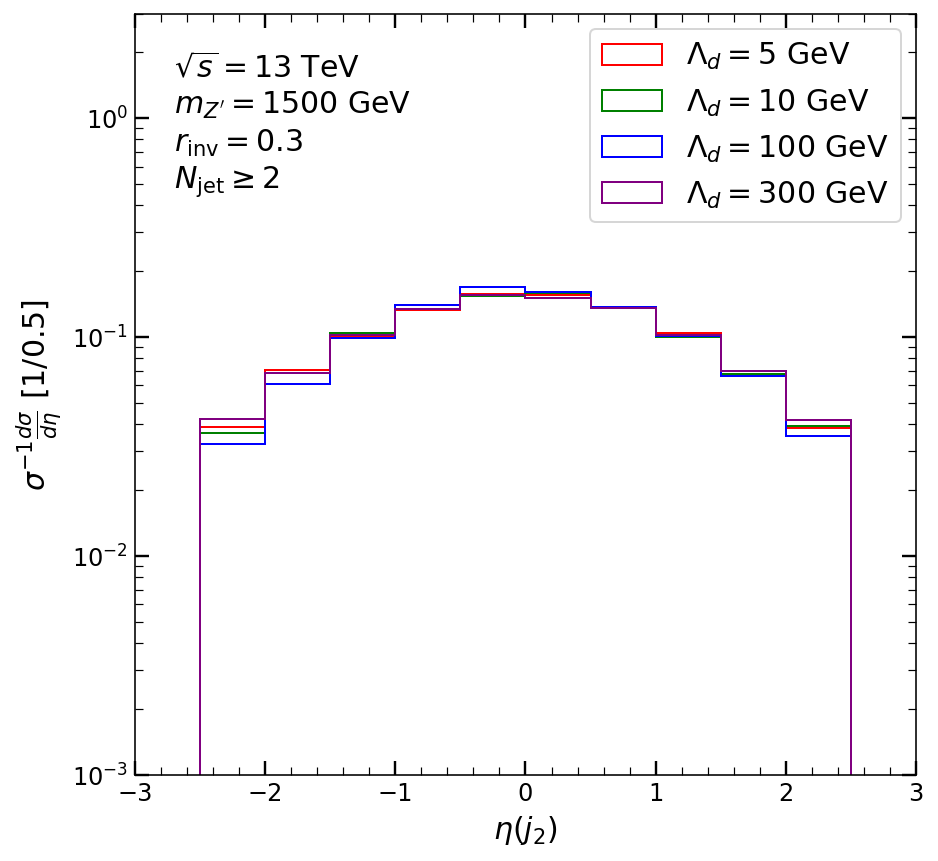

--------------------------------------------------------------------------------
Area of Lambdad [5, 10, 100, 300] = [1. 1. 1. 1.]


In [45]:
# 33. \eta(j_2) when N_jet >= 2
hist, bins = plotting('eta_2', [dataset[i+6] for i in range(0, len(dataset), 10)],
                      binning_eta, color, label,
                      weight=weight_jj_norm1, selected=selected_jj,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$\eta(j_2)$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\eta}$ [1/0.5]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(-3, 3), ylim=(1/1000, 3),
                      text=text_Njet2, text_xy=text_xy,
                      savefig='./figures_2_rinv3_varying_Lambdad/fig_33-dijet-eta_2.pdf')
print('-'*80)
print(f'Area of Lambdad {Lambdad} = {np.sum(hist, axis=1)}')

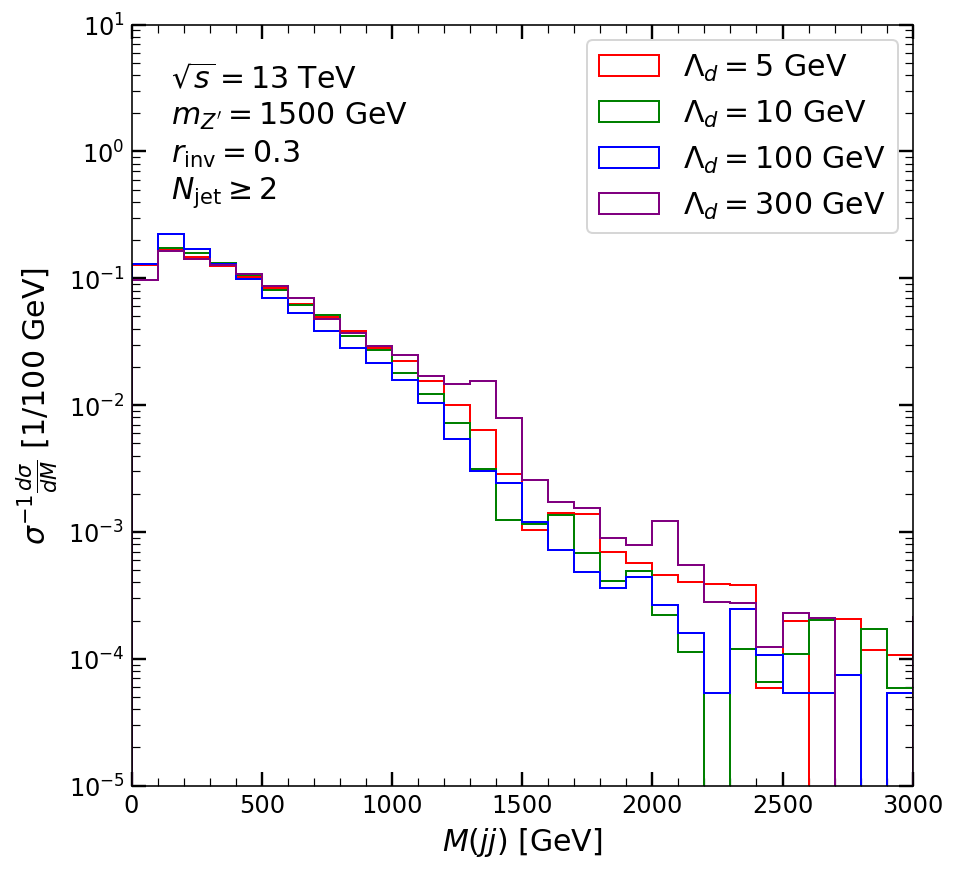

--------------------------------------------------------------------------------
Area of Lambdad [5, 10, 100, 300] = [1. 1. 1. 1.]


In [46]:
# 34. M(jj) when N_jet >= 2
hist, bins = plotting('M_jj', [dataset[i+6] for i in range(0, len(dataset), 10)],
                      binning, color, label,
                      weight=weight_jj_norm1, selected=selected_jj,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$M(jj)$ [GeV]',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{dM}$ [1/100 GeV]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, 3000), ylim=(1/100000, 10),
                      text=text_Njet2, text_xy=text_xy,
                      savefig='./figures_2_rinv3_varying_Lambdad/fig_34-dijet-M_jj.pdf')
print('-'*80)
print(f'Area of Lambdad {Lambdad} = {np.sum(hist, axis=1)}')

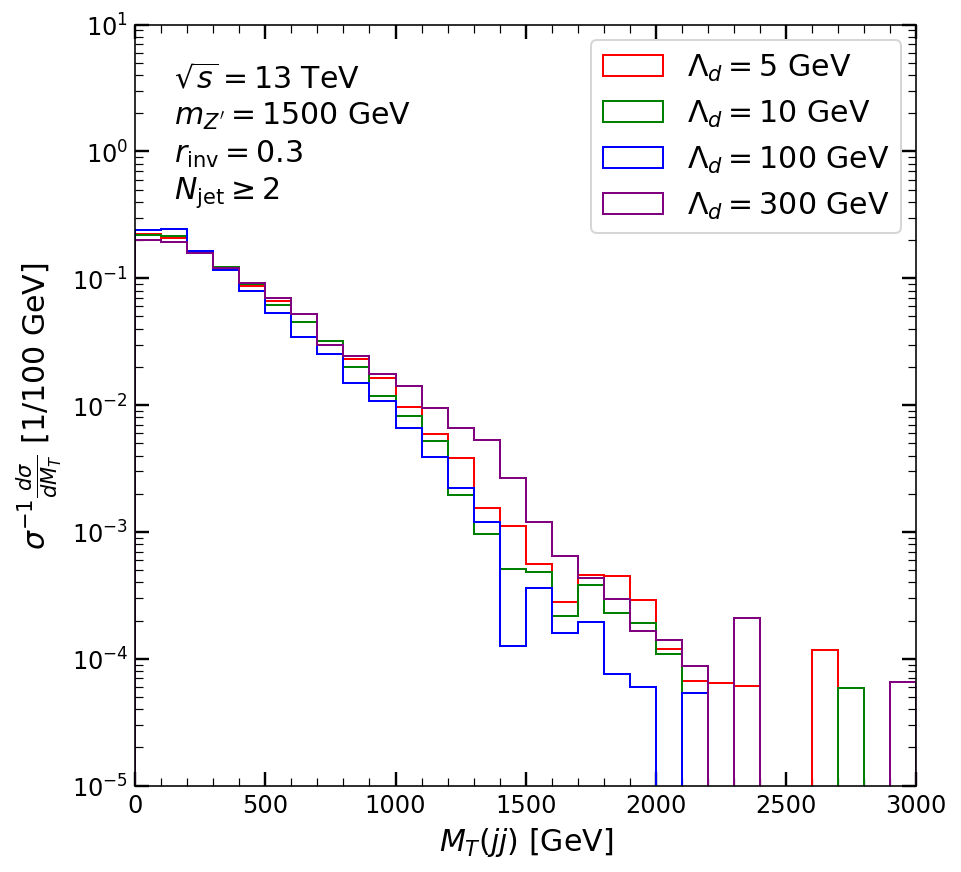

--------------------------------------------------------------------------------
Area of Lambdad [5, 10, 100, 300] = [1. 1. 1. 1.]


In [47]:
# 35. M_T(jj) when N_jet >= 2
hist, bins = plotting('MT_jj', [dataset[i+6] for i in range(0, len(dataset), 10)],
                      binning, color, label,
                      weight=weight_jj_norm1, selected=selected_jj,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$M_T(jj)$ [GeV]',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{dM_T}$ [1/100 GeV]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, 3000), ylim=(1/100000, 10),
                      text=text_Njet2, text_xy=text_xy,
                      savefig='./figures_2_rinv3_varying_Lambdad/fig_35-dijet-MT_jj.pdf')
print('-'*80)
print(f'Area of Lambdad {Lambdad} = {np.sum(hist, axis=1)}')

In [ ]:
# (skip) 36. m_T(jj) when N_jet >= 2

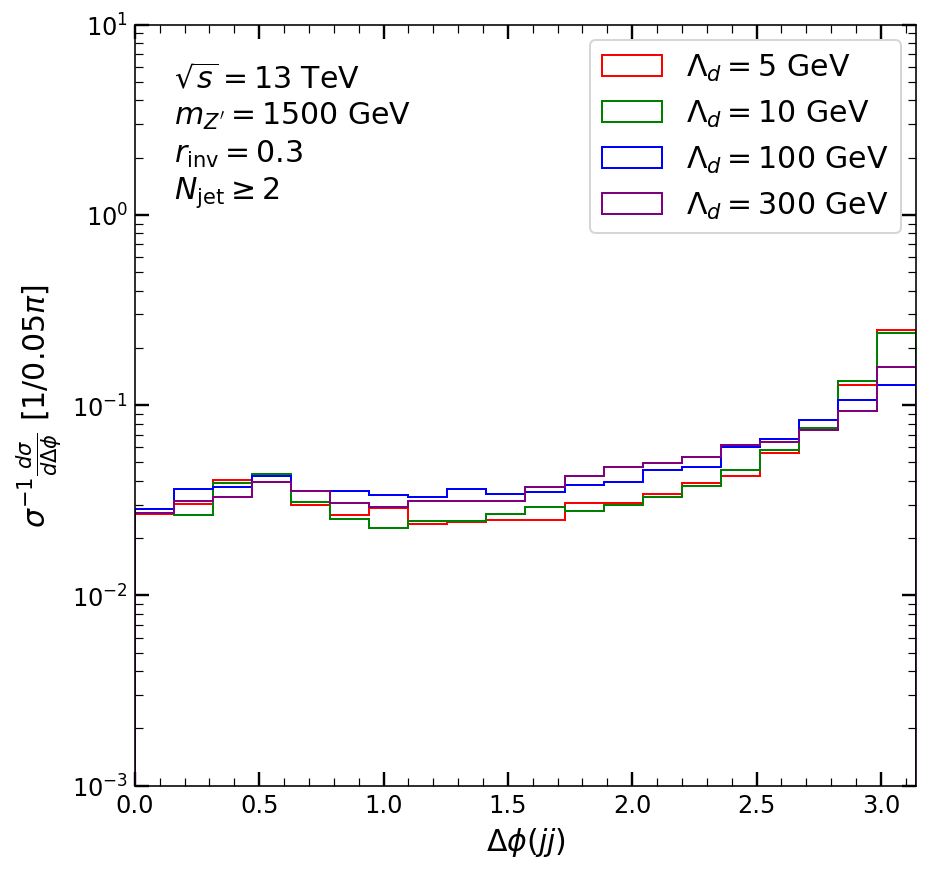

--------------------------------------------------------------------------------
Area of Lambdad [5, 10, 100, 300] = [1. 1. 1. 1.]


In [48]:
# 37. \Delta\phi(jj) when N_jet >= 2
hist, bins = plotting('Dphi', [dataset[i+6] for i in range(0, len(dataset), 10)],
                      binning_phi, color, label,
                      weight=weight_jj_norm1, selected=selected_jj,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$\Delta\phi(jj)$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\Delta\phi}$ [1/$0.05\pi$]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, np.pi), ylim=(1/1000, 10),
                      text=text_Njet2, text_xy=text_xy,
                      savefig='./figures_2_rinv3_varying_Lambdad/fig_37-dijet-Dphi.pdf')
print('-'*80)
print(f'Area of Lambdad {Lambdad} = {np.sum(hist, axis=1)}')

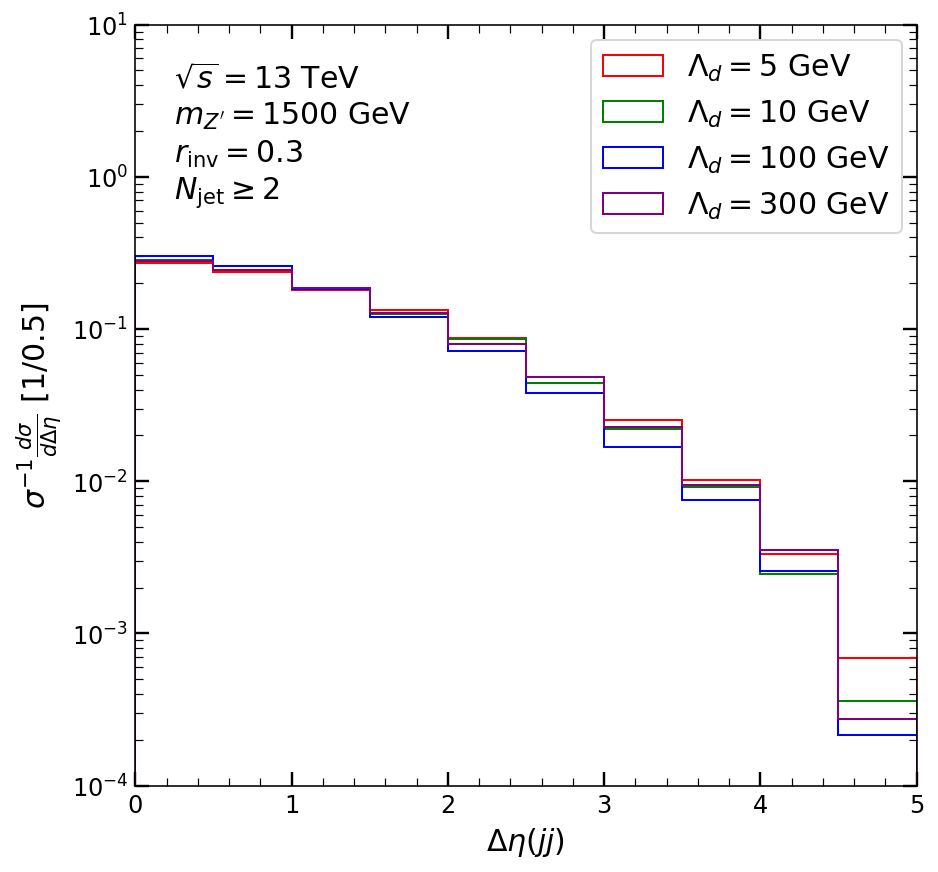

--------------------------------------------------------------------------------
Area of Lambdad [5, 10, 100, 300] = [1. 1. 1. 1.]


In [49]:
# 38. \Delta\eta(jj) when N_jet >= 2
hist, bins = plotting('Deta', [dataset[i+6] for i in range(0, len(dataset), 10)],
                      binning_eta, color, label,
                      weight=weight_jj_norm1, selected=selected_jj,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$\Delta\eta(jj)$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\Delta\eta}$ [1/0.5]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, 5), ylim=(1/10000, 10),
                      text=text_Njet2, text_xy=text_xy,
                      savefig='./figures_2_rinv3_varying_Lambdad/fig_38-dijet-Deta.pdf')
print('-'*80)
print(f'Area of Lambdad {Lambdad} = {np.sum(hist, axis=1)}')

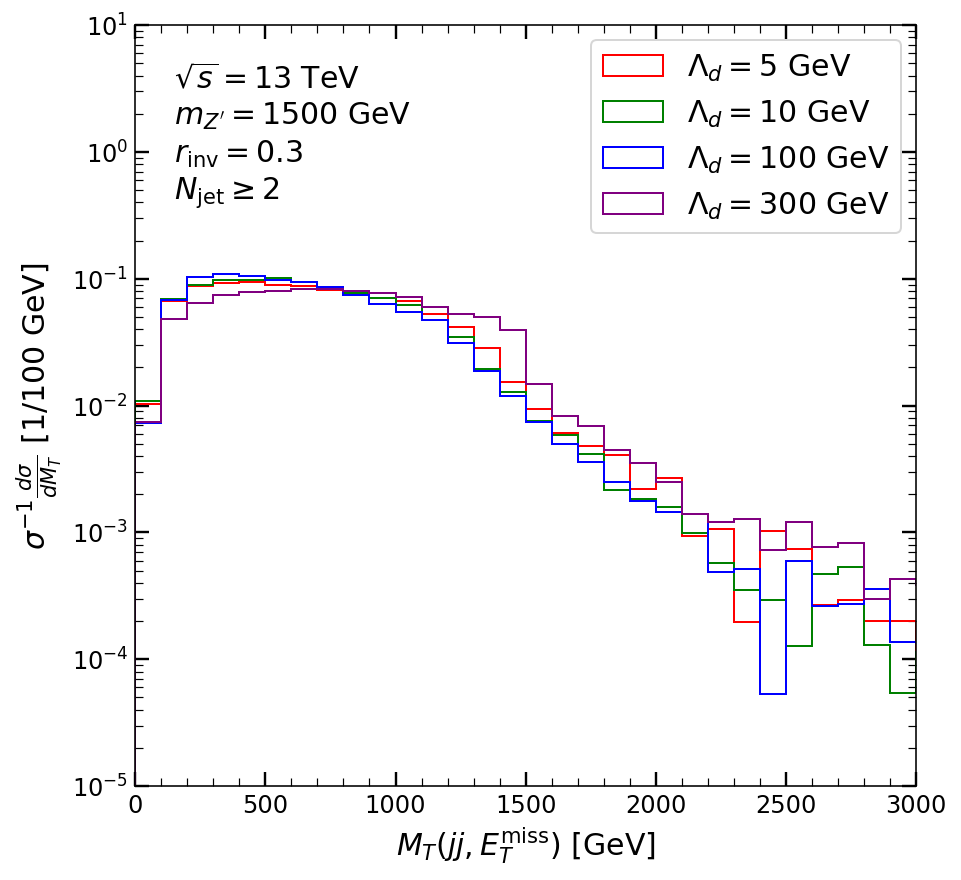

--------------------------------------------------------------------------------
Area of Lambdad [5, 10, 100, 300] = [1. 1. 1. 1.]


In [50]:
# 39. M_T(jj, MET) when N_jet >= 2
hist, bins = plotting('MT_jj_MET', [dataset[i+8] for i in range(0, len(dataset), 10)],
                      binning, color, label,
                      weight=weight_jj_norm1, selected=selected_jj,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$M_T(jj, E_T^\mathrm{miss})$ [GeV]',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{dM_T}$ [1/100 GeV]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, 3000), ylim=(1/100000, 10),
                      text=text_Njet2, text_xy=text_xy,
                      savefig='./figures_2_rinv3_varying_Lambdad/fig_39-dijet-MT_jj_MET.pdf')
print('-'*80)
print(f'Area of Lambdad {Lambdad} = {np.sum(hist, axis=1)}')

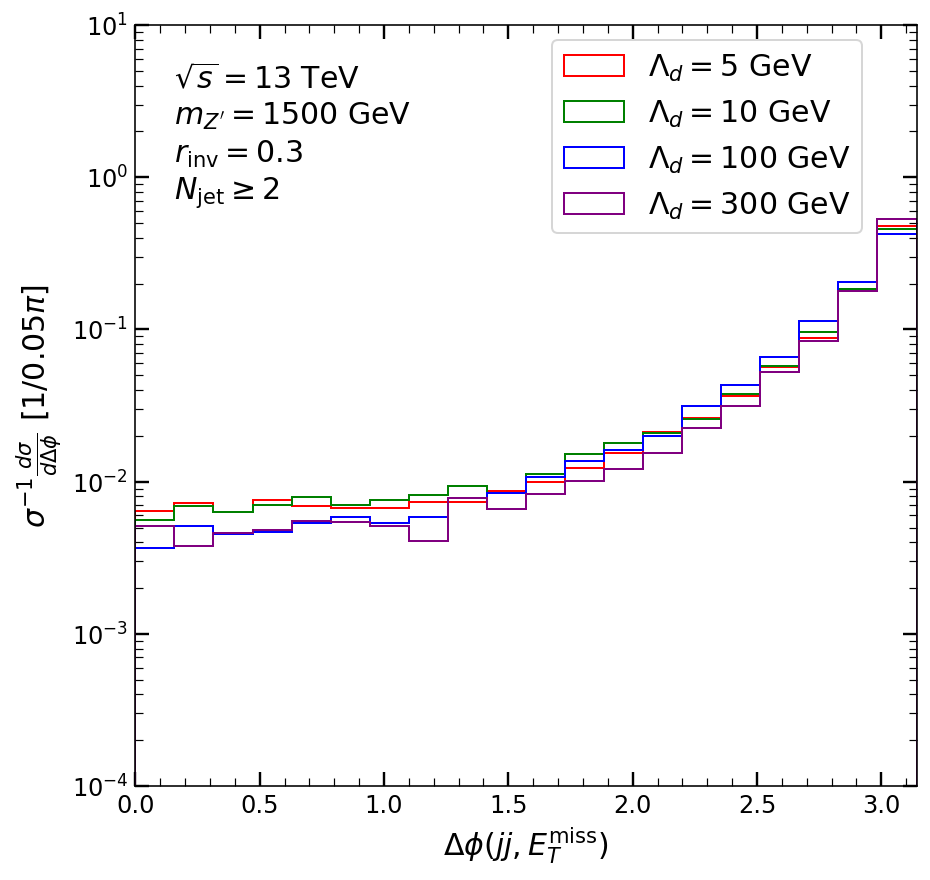

--------------------------------------------------------------------------------
Area of Lambdad [5, 10, 100, 300] = [1. 1. 1. 1.]


In [51]:
# 40. \Delta\phi(jj, MET) when N_jet >= 2
hist, bins = plotting('Dphi_jj_MET', [dataset[i+8] for i in range(0, len(dataset), 10)],
                      binning_phi, color, label,
                      weight=weight_jj_norm1, selected=selected_jj,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      legend_bbox_to_anchor=(0.95, 1),
                      xlabel=r'$\Delta\phi(jj, E_T^\mathrm{miss})$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\Delta\phi}$ [1/$0.05\pi$]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, np.pi), ylim=(1/10000, 10),
                      text=text_Njet2, text_xy=text_xy,
                      savefig='./figures_2_rinv3_varying_Lambdad/fig_40-dijet-Dphi_jj_MET.pdf')
print('-'*80)
print(f'Area of Lambdad {Lambdad} = {np.sum(hist, axis=1)}')

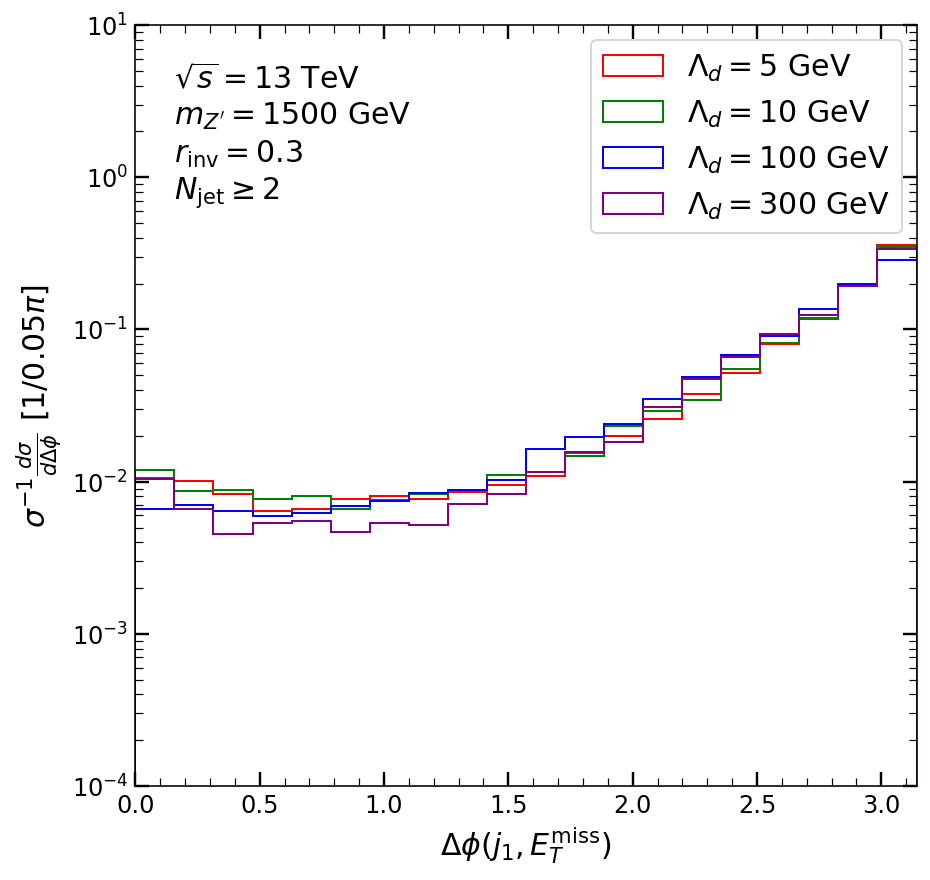

--------------------------------------------------------------------------------
Area of Lambdad [5, 10, 100, 300] = [1. 1. 1. 1.]


In [52]:
# 41. \Delta\phi(j_1, MET) when N_jet >= 2
hist, bins = plotting('Dphi_j1_MET', [dataset[i+8] for i in range(0, len(dataset), 10)],
                      binning_phi, color, label,
                      weight=weight_jj_norm1, selected=selected_jj,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$\Delta\phi(j_1, E_T^\mathrm{miss})$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\Delta\phi}$ [1/$0.05\pi$]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, np.pi), ylim=(1/10000, 10),
                      text=text_Njet2, text_xy=text_xy,
                      savefig='./figures_2_rinv3_varying_Lambdad/fig_41-dijet-Dphi_j1_MET.pdf')
print('-'*80)
print(f'Area of Lambdad {Lambdad} = {np.sum(hist, axis=1)}')

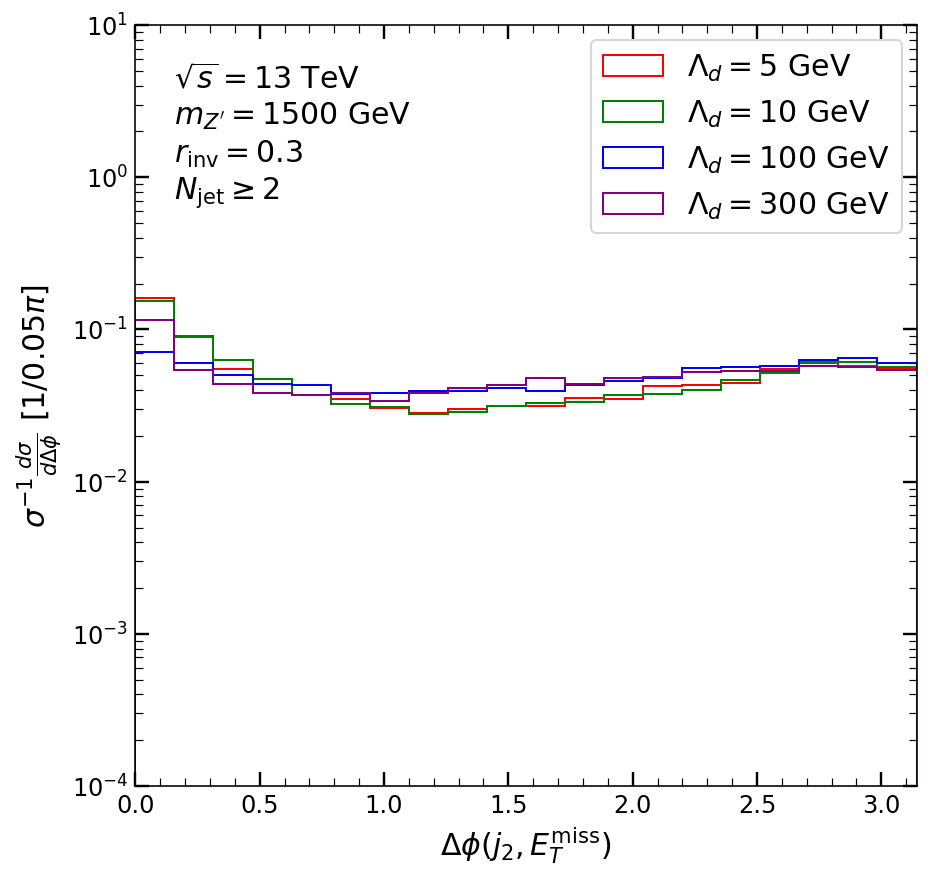

--------------------------------------------------------------------------------
Area of Lambdad [5, 10, 100, 300] = [1. 1. 1. 1.]


In [53]:
# 42. \Delta\phi(j_2, MET) when N_jet >= 2
hist, bins = plotting('Dphi_j2_MET', [dataset[i+8] for i in range(0, len(dataset), 10)],
                      binning_phi, color, label,
                      weight=weight_jj_norm1, selected=selected_jj,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$\Delta\phi(j_2, E_T^\mathrm{miss})$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\Delta\phi}$ [1/$0.05\pi$]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, np.pi), ylim=(1/10000, 10),
                      text=text_Njet2, text_xy=text_xy,
                      savefig='./figures_2_rinv3_varying_Lambdad/fig_42-dijet-Dphi_j2_MET.pdf')
print('-'*80)
print(f'Area of Lambdad {Lambdad} = {np.sum(hist, axis=1)}')

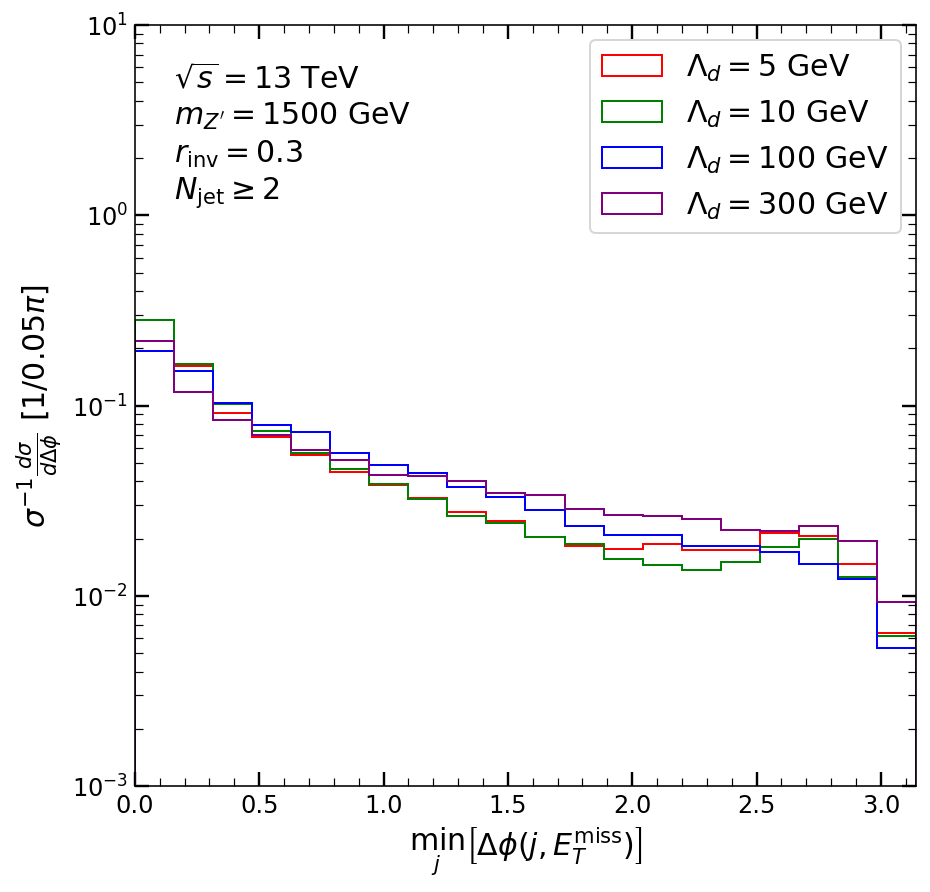

--------------------------------------------------------------------------------
Area of Lambdad [5, 10, 100, 300] = [1. 1. 1. 1.]


In [54]:
# 43. \min\Delta\phi(j, MET) when N_jet >= 2
hist, bins = plotting('min_Dphi_j_MET', [dataset[i+8] for i in range(0, len(dataset), 10)],
                      binning_phi, color, label,
                      weight=weight_jj_norm1, selected=selected_jj,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$\min_j\left[\Delta\phi(j, E_T^\mathrm{miss})\right]$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\Delta\phi}$ [1/$0.05\pi$]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, np.pi), ylim=(1/1000, 10),
                      text=text_Njet2, text_xy=text_xy,
                      savefig='./figures_2_rinv3_varying_Lambdad/fig_43-dijet-min_Dphi_j_MET.pdf')
print('-'*80)
print(f'Area of Lambdad {Lambdad} = {np.sum(hist, axis=1)}')

In [ ]:
# (skip) 44. \min_{j <= 4}\Delta\phi(j, MET) when N_jet >= 2
# (skip) 45. \min_{j <= 6}\Delta\phi(j, MET) when N_jet >= 2
# (skip) 46. \min_{j <= 9}\Delta\phi(j, MET) when N_jet >= 2

### 3-4. Event selection $N_\mathrm{jet} \ge 3$

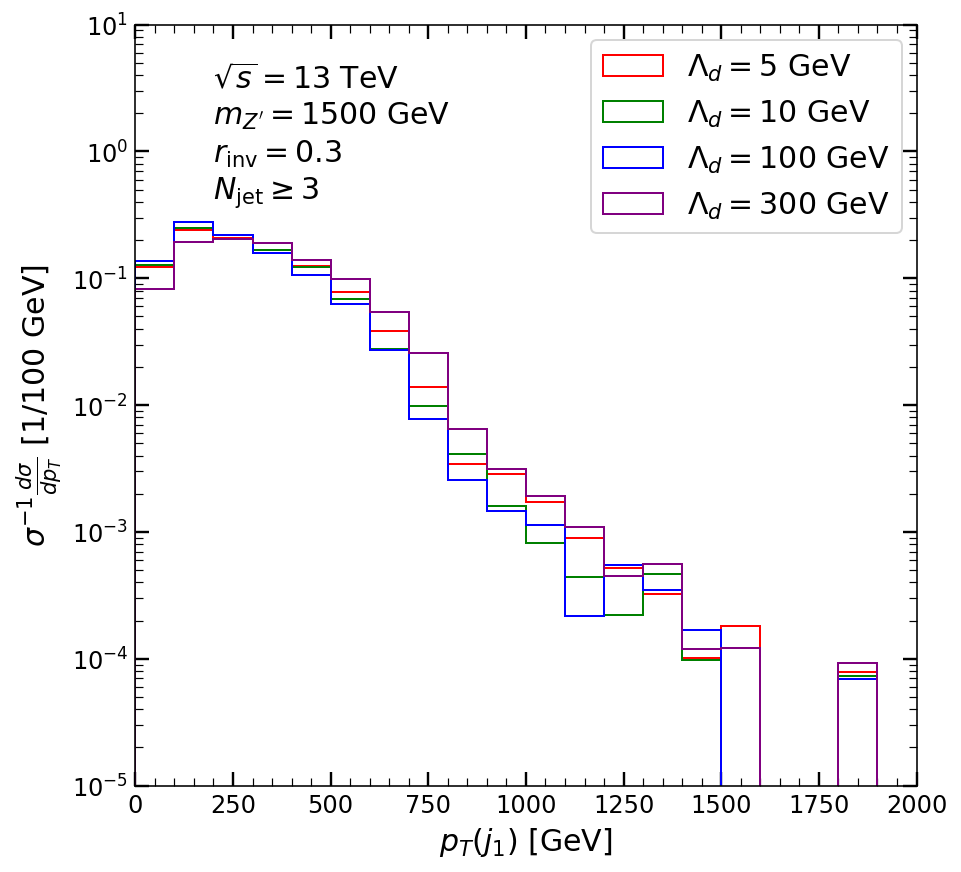

--------------------------------------------------------------------------------
Area of Lambdad [5, 10, 100, 300] = [1. 1. 1. 1.]


In [55]:
# 47. p_T(j_1) when N_jet >= 3
hist, bins = plotting('pT_1', [dataset[i+7] for i in range(0, len(dataset), 10)],
                      binning, color, label,
                      weight=weight_jjj_norm1, selected=selected_jjj,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$p_T(j_1)$ [GeV]',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{dp_T}$ [1/100 GeV]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, 2000), ylim=(1/100000, 10),
                      text=text_Njet3, text_xy=(0.1, 0.93),
                      savefig='./figures_2_rinv3_varying_Lambdad/fig_47-trijet-pT_1.pdf')
print('-'*80)
print(f'Area of Lambdad {Lambdad} = {np.sum(hist, axis=1)}')

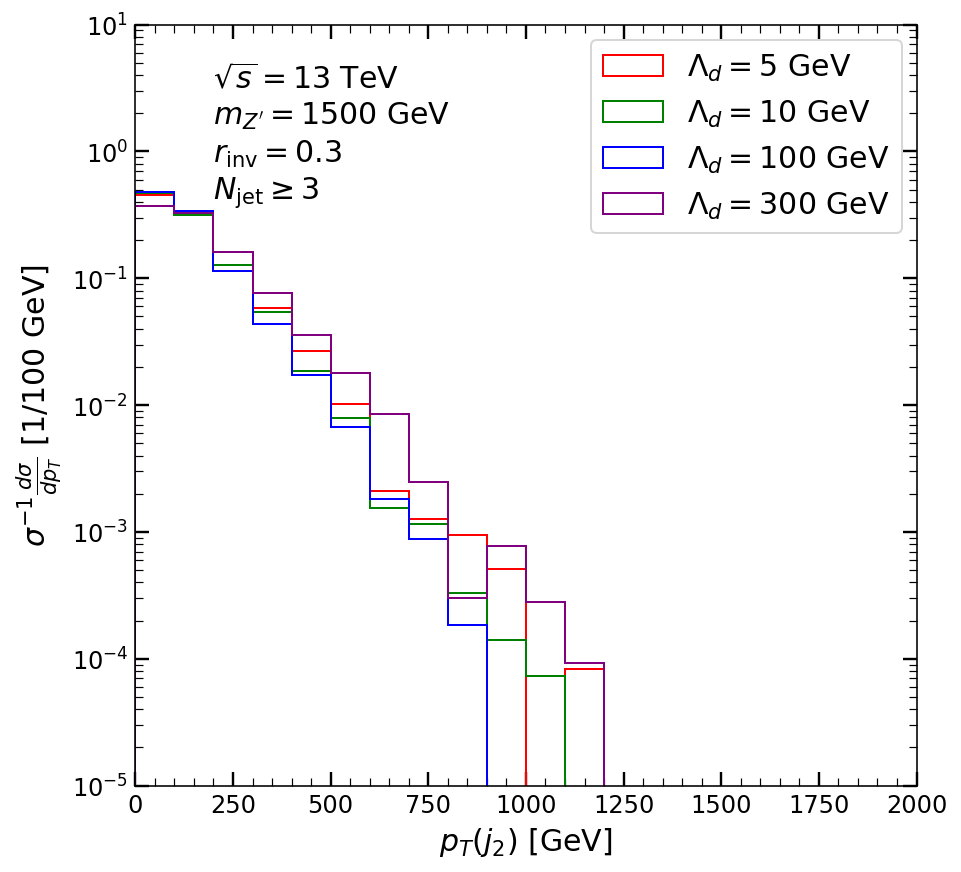

--------------------------------------------------------------------------------
Area of Lambdad [5, 10, 100, 300] = [1. 1. 1. 1.]


In [56]:
# 48. p_T(j_2) when N_jet >= 3
hist, bins = plotting('pT_2', [dataset[i+7] for i in range(0, len(dataset), 10)],
                      binning, color, label,
                      weight=weight_jjj_norm1, selected=selected_jjj,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$p_T(j_2)$ [GeV]',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{dp_T}$ [1/100 GeV]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, 2000), ylim=(1/100000, 10),
                      text=text_Njet3, text_xy=(0.1, 0.93),
                      savefig='./figures_2_rinv3_varying_Lambdad/fig_48-trijet-pT_2.pdf')
print('-'*80)
print(f'Area of Lambdad {Lambdad} = {np.sum(hist, axis=1)}')

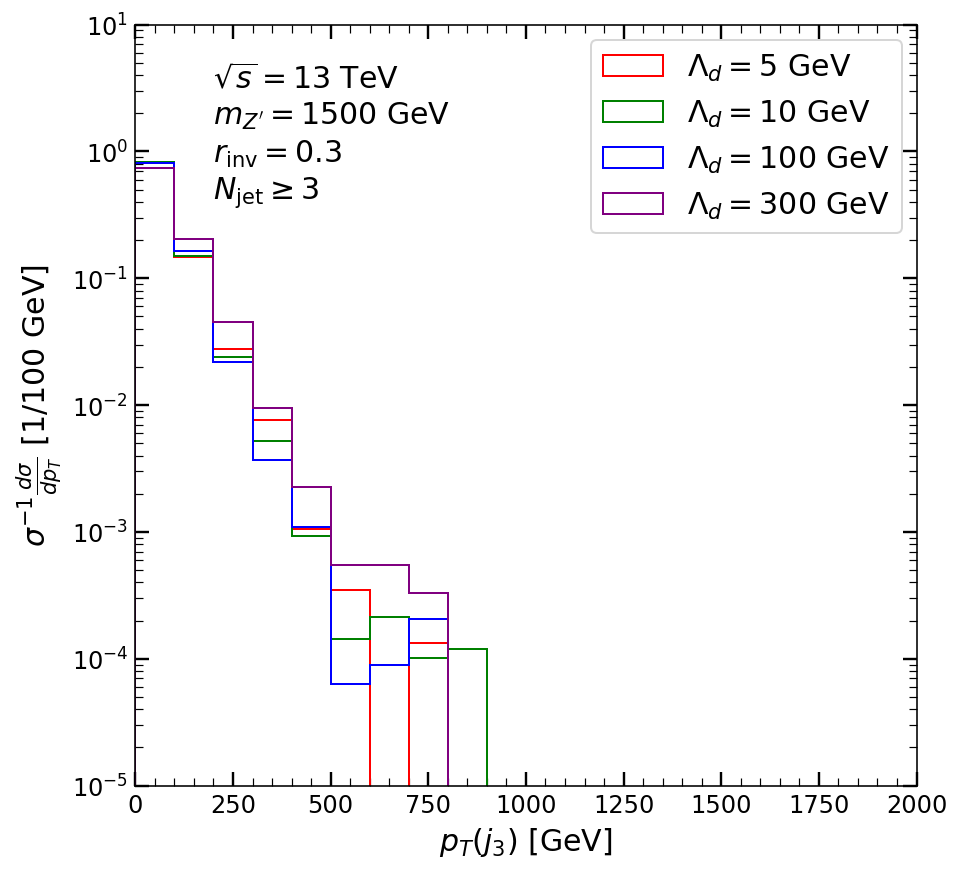

--------------------------------------------------------------------------------
Area of Lambdad [5, 10, 100, 300] = [1. 1. 1. 1.]


In [57]:
# 49. p_T(j_3) when N_jet >= 3
hist, bins = plotting('pT_3', [dataset[i+7] for i in range(0, len(dataset), 10)],
                      binning, color, label,
                      weight=weight_jjj_norm1, selected=selected_jjj,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$p_T(j_3)$ [GeV]',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{dp_T}$ [1/100 GeV]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, 2000), ylim=(1/100000, 10),
                      text=text_Njet3, text_xy=(0.1, 0.93),
                      savefig='./figures_2_rinv3_varying_Lambdad/fig_49-trijet-pT_3.pdf')
print('-'*80)
print(f'Area of Lambdad {Lambdad} = {np.sum(hist, axis=1)}')

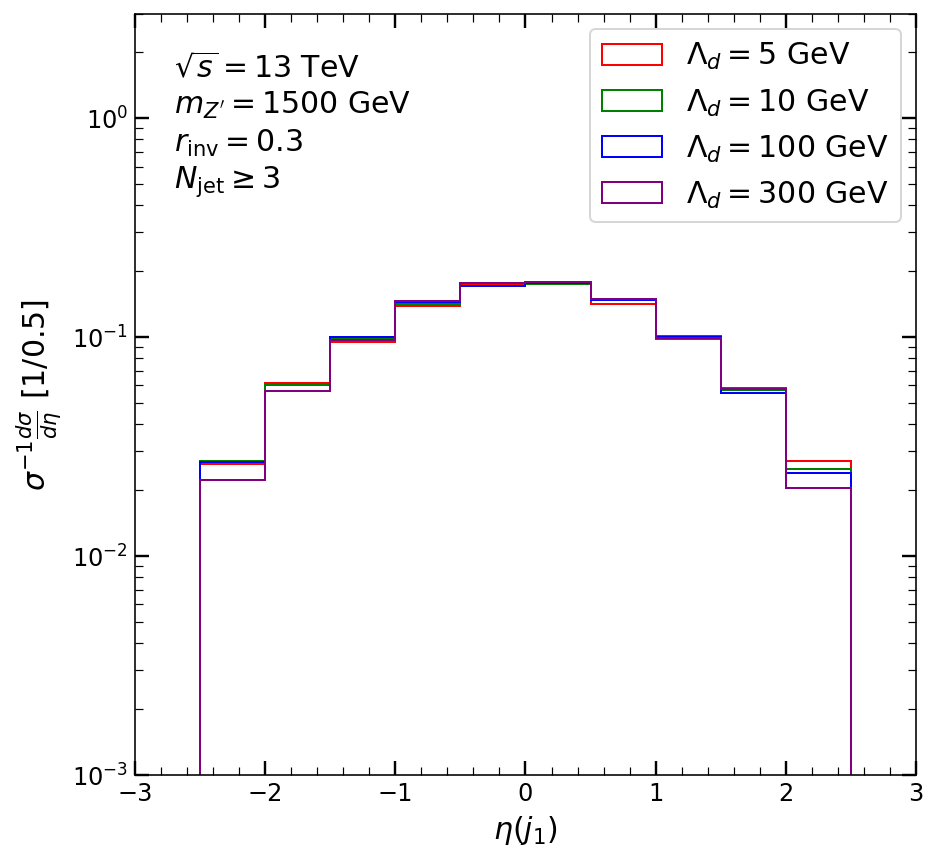

--------------------------------------------------------------------------------
Area of Lambdad [5, 10, 100, 300] = [1. 1. 1. 1.]


In [58]:
# 50. \eta(j_1) when N_jet >= 3
hist, bins = plotting('eta_1', [dataset[i+7] for i in range(0, len(dataset), 10)],
                      binning_eta, color, label,
                      weight=weight_jjj_norm1, selected=selected_jjj,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$\eta(j_1)$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\eta}$ [1/0.5]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(-3, 3), ylim=(1/1000, 3),
                      text=text_Njet3, text_xy=text_xy,
                      savefig='./figures_2_rinv3_varying_Lambdad/fig_50-trijet-eta_1.pdf')
print('-'*80)
print(f'Area of Lambdad {Lambdad} = {np.sum(hist, axis=1)}')

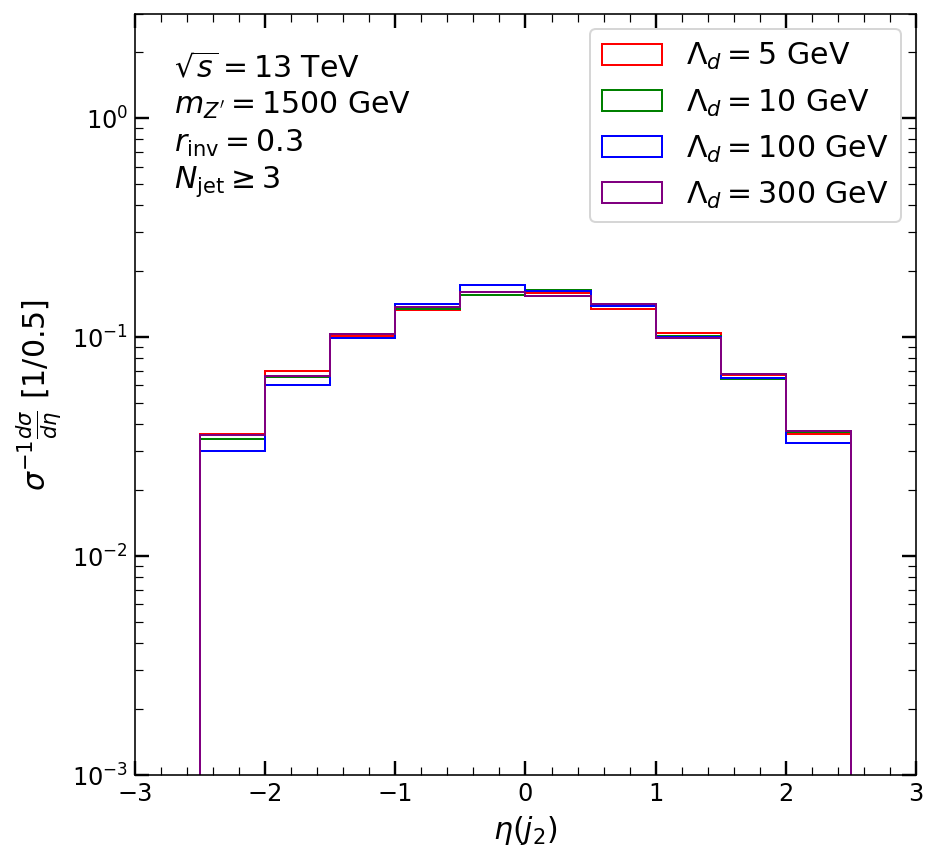

--------------------------------------------------------------------------------
Area of Lambdad [5, 10, 100, 300] = [1. 1. 1. 1.]


In [59]:
# 51. \eta(j_2) when N_jet >= 3
hist, bins = plotting('eta_2', [dataset[i+7] for i in range(0, len(dataset), 10)],
                      binning_eta, color, label,
                      weight=weight_jjj_norm1, selected=selected_jjj,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$\eta(j_2)$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\eta}$ [1/0.5]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(-3, 3), ylim=(1/1000, 3),
                      text=text_Njet3, text_xy=text_xy,
                      savefig='./figures_2_rinv3_varying_Lambdad/fig_51-trijet-eta_2.pdf')
print('-'*80)
print(f'Area of Lambdad {Lambdad} = {np.sum(hist, axis=1)}')

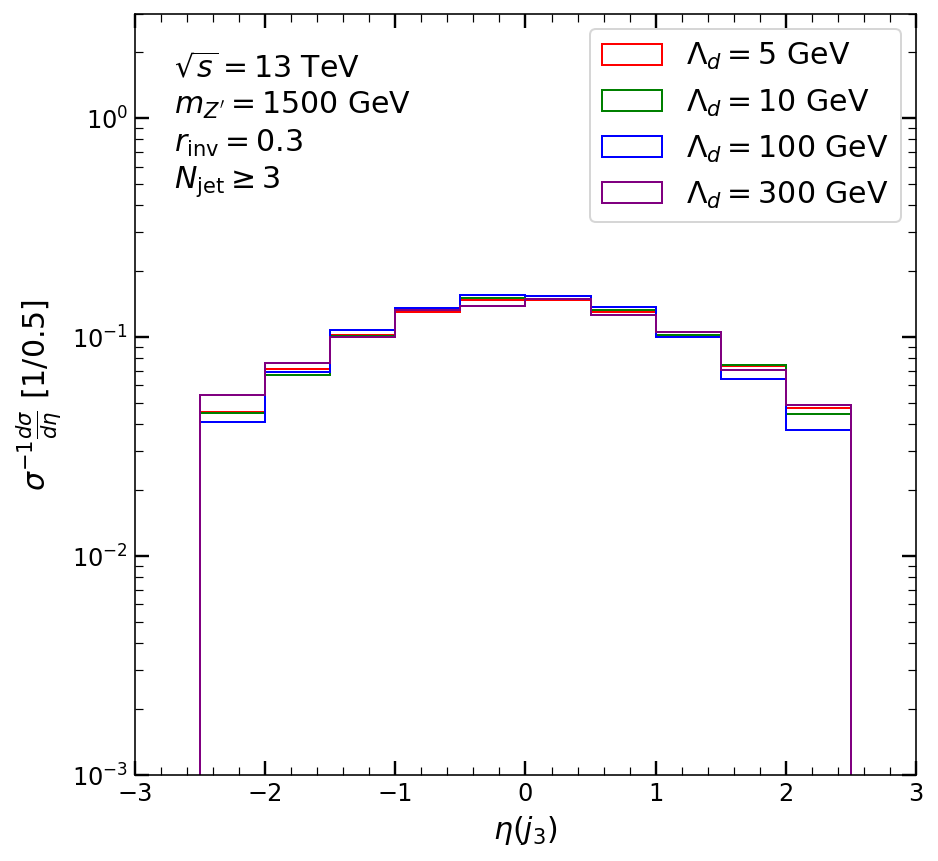

--------------------------------------------------------------------------------
Area of Lambdad [5, 10, 100, 300] = [1. 1. 1. 1.]


In [60]:
# 52. \eta(j_3) when N_jet >= 3
hist, bins = plotting('eta_3', [dataset[i+7] for i in range(0, len(dataset), 10)],
                      binning_eta, color, label,
                      weight=weight_jjj_norm1, selected=selected_jjj,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$\eta(j_3)$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\eta}$ [1/0.5]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(-3, 3), ylim=(1/1000, 3),
                      text=text_Njet3, text_xy=text_xy,
                      savefig='./figures_2_rinv3_varying_Lambdad/fig_52-trijet-eta_3.pdf')
print('-'*80)
print(f'Area of Lambdad {Lambdad} = {np.sum(hist, axis=1)}')

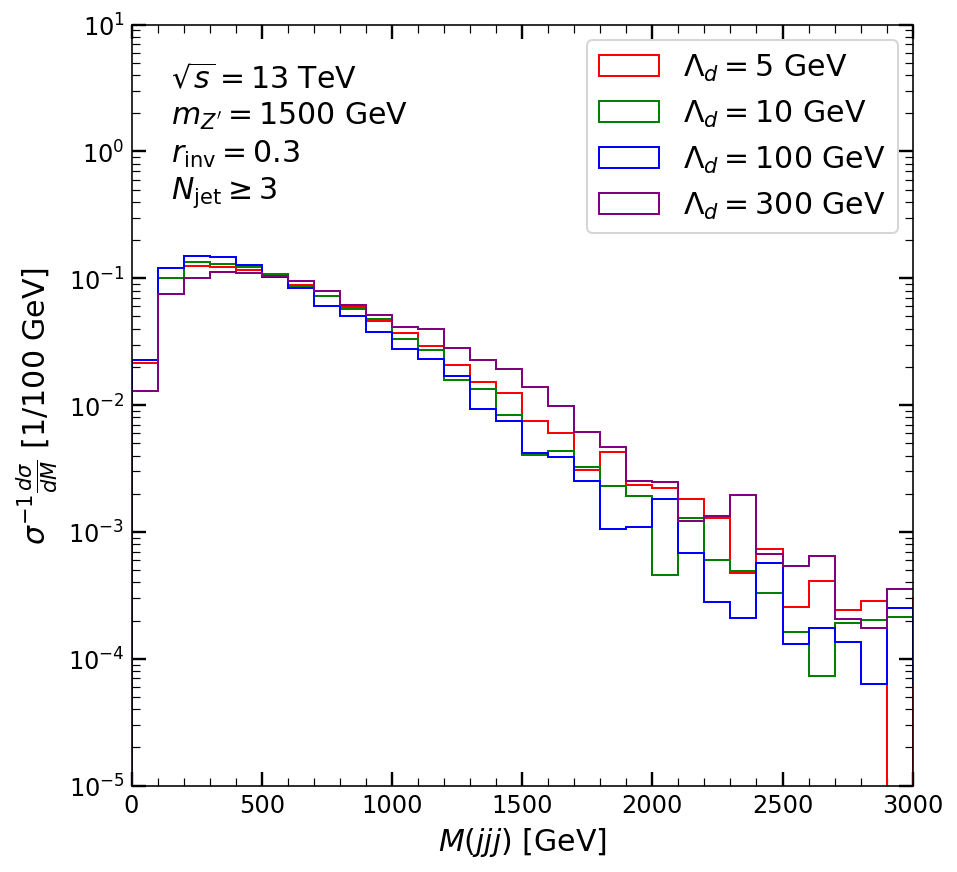

--------------------------------------------------------------------------------
Area of Lambdad [5, 10, 100, 300] = [1. 1. 1. 1.]


In [61]:
# 53. M(jjj) when N_jet >= 3
hist, bins = plotting('M_jjj', [dataset[i+7] for i in range(0, len(dataset), 10)],
                      binning, color, label,
                      weight=weight_jjj_norm1, selected=selected_jjj,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$M(jjj)$ [GeV]',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{dM}$ [1/100 GeV]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, 3000), ylim=(1/100000, 10),
                      text=text_Njet3, text_xy=text_xy,
                      savefig='./figures_2_rinv3_varying_Lambdad/fig_53-trijet-M_jjj.pdf')
print('-'*80)
print(f'Area of Lambdad {Lambdad} = {np.sum(hist, axis=1)}')

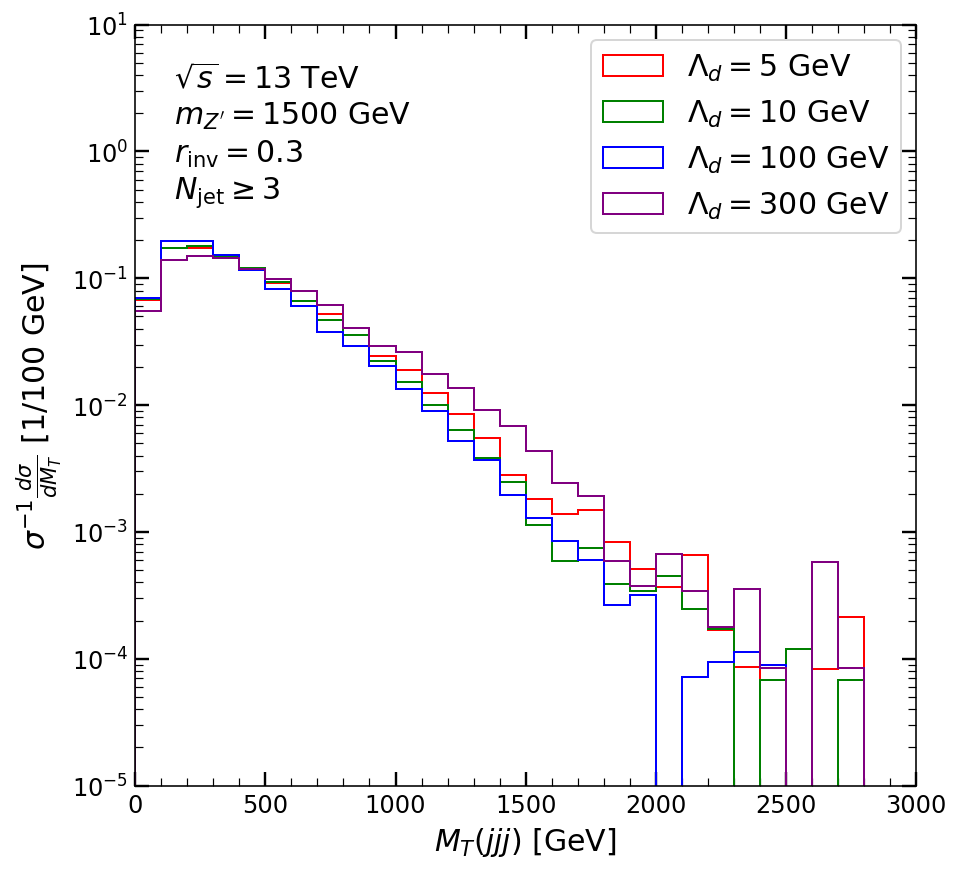

--------------------------------------------------------------------------------
Area of Lambdad [5, 10, 100, 300] = [1. 1. 1. 1.]


In [62]:
# 54. M_T(jjj) when N_jet >= 3
hist, bins = plotting('MT_jjj', [dataset[i+7] for i in range(0, len(dataset), 10)],
                      binning, color, label,
                      weight=weight_jjj_norm1, selected=selected_jjj,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$M_T(jjj)$ [GeV]',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{dM_T}$ [1/100 GeV]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, 3000), ylim=(1/100000, 10),
                      text=text_Njet3, text_xy=text_xy,
                      savefig='./figures_2_rinv3_varying_Lambdad/fig_54-trijet-MT_jjj.pdf')
print('-'*80)
print(f'Area of Lambdad {Lambdad} = {np.sum(hist, axis=1)}')

In [ ]:
# (skip) 55. m_T(jjj) when N_jet >= 3

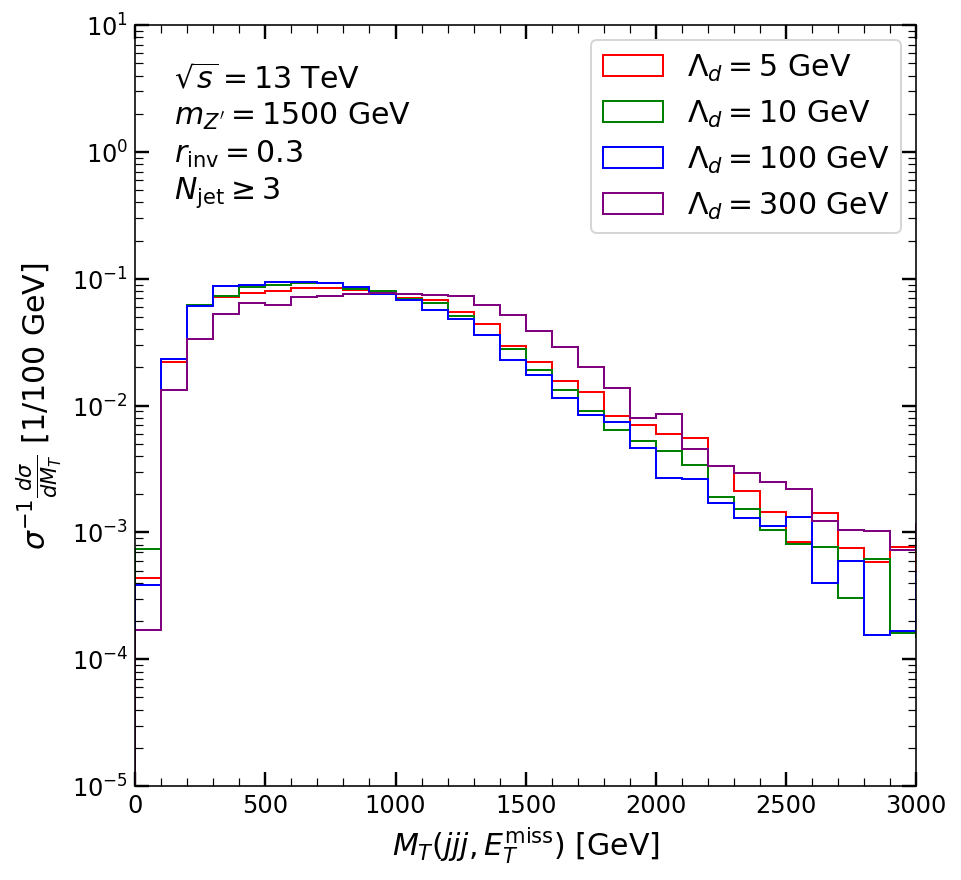

--------------------------------------------------------------------------------
Area of Lambdad [5, 10, 100, 300] = [1. 1. 1. 1.]


In [63]:
# 56. M_T(jjj, MET) when N_jet >= 3
hist, bins = plotting('MT_jjj_MET', [dataset[i+9] for i in range(0, len(dataset), 10)],
                      binning, color, label,
                      weight=weight_jjj_norm1, selected=selected_jjj,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$M_T(jjj, E_T^\mathrm{miss})$ [GeV]',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{dM_T}$ [1/100 GeV]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, 3000), ylim=(1/100000, 10),
                      text=text_Njet3, text_xy=text_xy,
                      savefig='./figures_2_rinv3_varying_Lambdad/fig_56-trijet-MT_jjj_MET.pdf')
print('-'*80)
print(f'Area of Lambdad {Lambdad} = {np.sum(hist, axis=1)}')

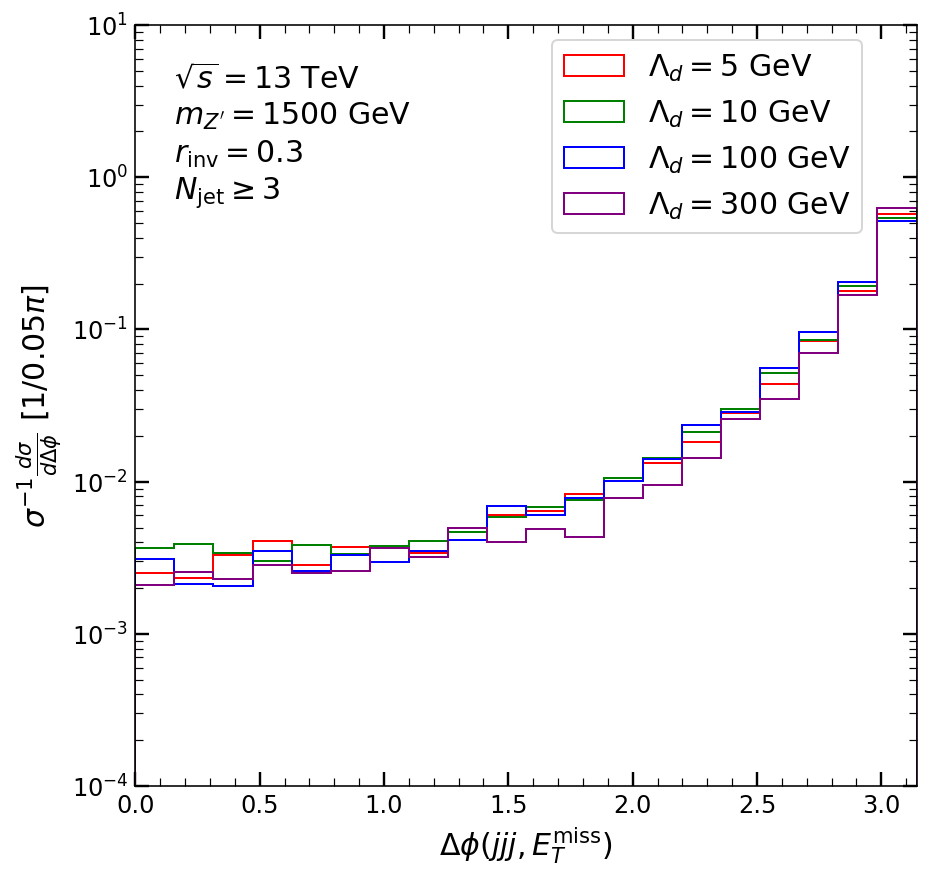

--------------------------------------------------------------------------------
Area of Lambdad [5, 10, 100, 300] = [1. 1. 1. 1.]


In [64]:
# 57. \Delta\phi(jjj, MET) when N_jet >= 3
hist, bins = plotting('Dphi_jjj_MET', [dataset[i+9] for i in range(0, len(dataset), 10)],
                      binning_phi, color, label,
                      weight=weight_jjj_norm1, selected=selected_jjj,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      legend_bbox_to_anchor=(0.95, 1),
                      xlabel=r'$\Delta\phi(jjj, E_T^\mathrm{miss})$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\Delta\phi}$ [1/$0.05\pi$]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, np.pi), ylim=(1/10000, 10),
                      text=text_Njet3, text_xy=text_xy,
                      savefig='./figures_2_rinv3_varying_Lambdad/fig_57-trijet-Dphi_jjj_MET.pdf')
print('-'*80)
print(f'Area of Lambdad {Lambdad} = {np.sum(hist, axis=1)}')

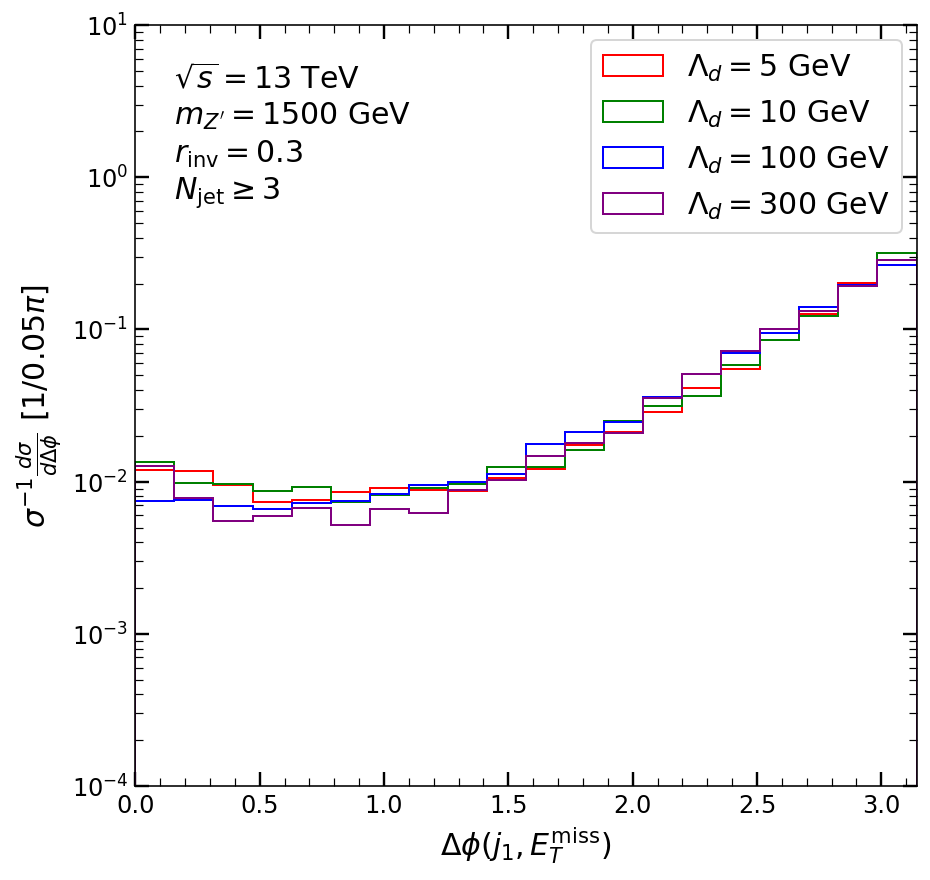

--------------------------------------------------------------------------------
Area of Lambdad [5, 10, 100, 300] = [1. 1. 1. 1.]


In [65]:
# 58. \Delta\phi(j_1, MET) when N_jet >= 3
hist, bins = plotting('Dphi_j1_MET', [dataset[i+9] for i in range(0, len(dataset), 10)],
                      binning_phi, color, label,
                      weight=weight_jjj_norm1, selected=selected_jjj,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$\Delta\phi(j_1, E_T^\mathrm{miss})$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\Delta\phi}$ [1/$0.05\pi$]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, np.pi), ylim=(1/10000, 10),
                      text=text_Njet3, text_xy=text_xy,
                      savefig='./figures_2_rinv3_varying_Lambdad/fig_58-trijet-Dphi_j1_MET.pdf')
print('-'*80)
print(f'Area of Lambdad {Lambdad} = {np.sum(hist, axis=1)}')

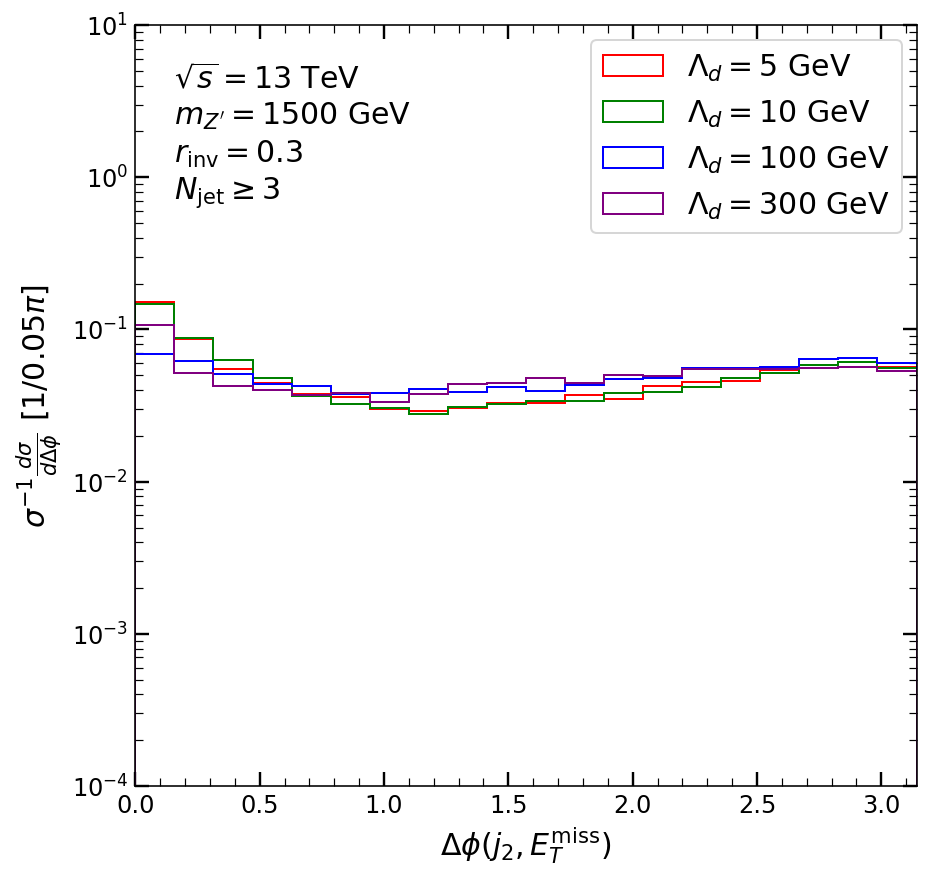

--------------------------------------------------------------------------------
Area of Lambdad [5, 10, 100, 300] = [1. 1. 1. 1.]


In [66]:
# 59. \Delta\phi(j_2, MET) when N_jet >= 3
hist, bins = plotting('Dphi_j2_MET', [dataset[i+9] for i in range(0, len(dataset), 10)],
                      binning_phi, color, label,
                      weight=weight_jjj_norm1, selected=selected_jjj,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$\Delta\phi(j_2, E_T^\mathrm{miss})$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\Delta\phi}$ [1/$0.05\pi$]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, np.pi), ylim=(1/10000, 10),
                      text=text_Njet3, text_xy=text_xy,
                      savefig='./figures_2_rinv3_varying_Lambdad/fig_59-trijet-Dphi_j2_MET.pdf')
print('-'*80)
print(f'Area of Lambdad {Lambdad} = {np.sum(hist, axis=1)}')

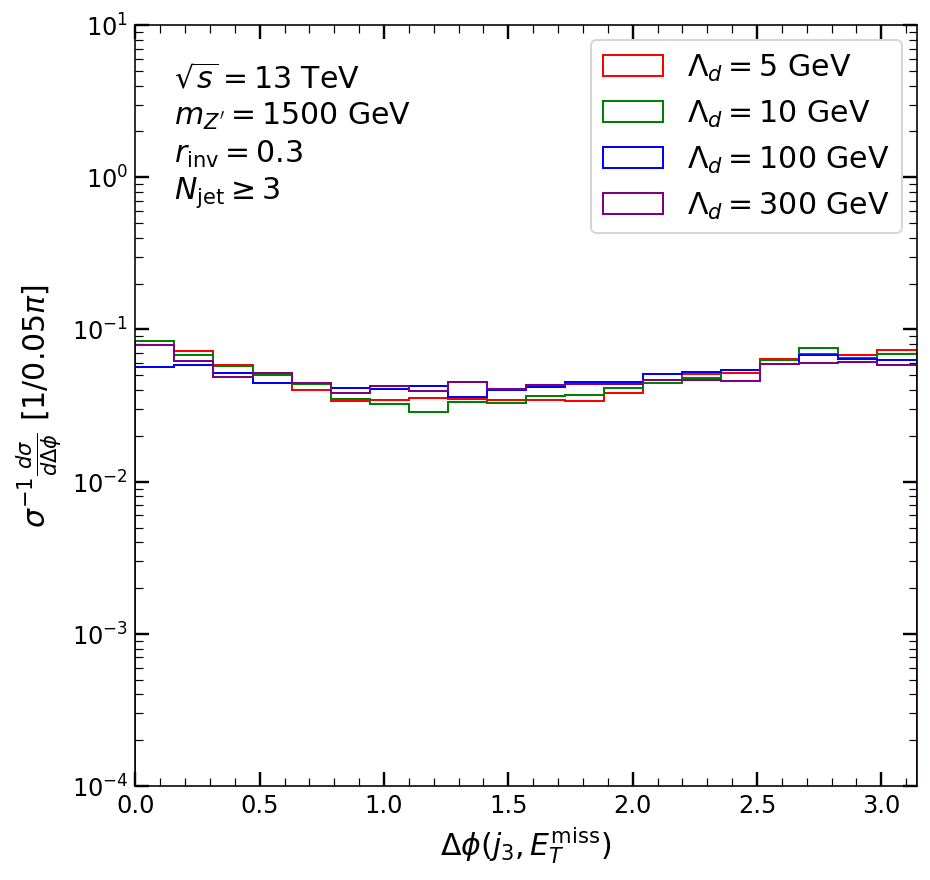

--------------------------------------------------------------------------------
Area of Lambdad [5, 10, 100, 300] = [1. 1. 1. 1.]


In [67]:
# 60. \Delta\phi(j_3, MET) when N_jet >= 3
hist, bins = plotting('Dphi_j3_MET', [dataset[i+9] for i in range(0, len(dataset), 10)],
                      binning_phi, color, label,
                      weight=weight_jjj_norm1, selected=selected_jjj,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$\Delta\phi(j_3, E_T^\mathrm{miss})$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\Delta\phi}$ [1/$0.05\pi$]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, np.pi), ylim=(1/10000, 10),
                      text=text_Njet3, text_xy=text_xy,
                      savefig='./figures_2_rinv3_varying_Lambdad/fig_60-trijet-Dphi_j3_MET.pdf')
print('-'*80)
print(f'Area of Lambdad {Lambdad} = {np.sum(hist, axis=1)}')

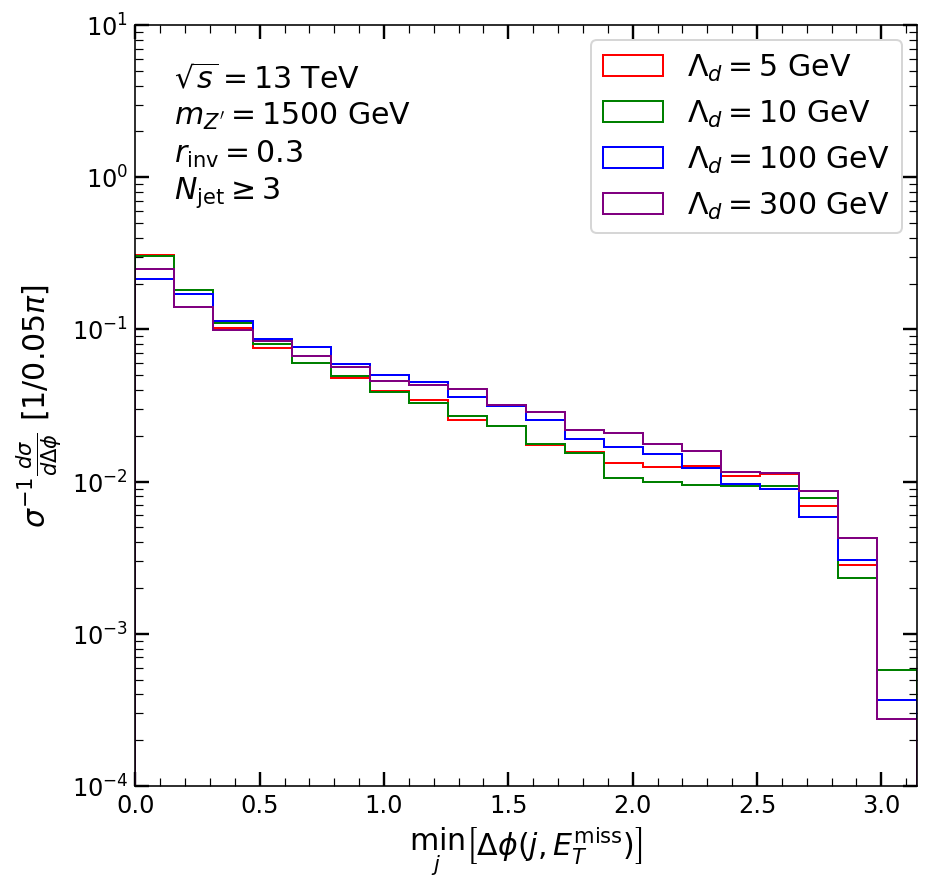

--------------------------------------------------------------------------------
Area of Lambdad [5, 10, 100, 300] = [1. 1. 1. 1.]


In [68]:
# 61. \min_{j}\Delta\phi(j, MET) when N_jet >= 3
hist, bins = plotting('min_Dphi_j_MET', [dataset[i+9] for i in range(0, len(dataset), 10)],
                      binning_phi, color, label,
                      weight=weight_jjj_norm1, selected=selected_jjj,
                      check_normalized_to_1=False, weight_normal=weight,
                      set_title=None,
                      xlabel=r'$\min_j\left[\Delta\phi(j, E_T^\mathrm{miss})\right]$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{d\Delta\phi}$ [1/$0.05\pi$]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, np.pi), ylim=(1/10000, 10),
                      text=text_Njet3, text_xy=text_xy,
                      savefig='./figures_2_rinv3_varying_Lambdad/fig_61-trijet-min_Dphi_j_MET.pdf')
print('-'*80)
print(f'Area of Lambdad {Lambdad} = {np.sum(hist, axis=1)}')

In [ ]:
# (skip) 62. \min_{j <= 4}\Delta\phi(j, MET) when N_jet >= 3
# (skip) 63. \min_{j <= 6}\Delta\phi(j, MET) when N_jet >= 3
# (skip) 64. \min_{j <= 9}\Delta\phi(j, MET) when N_jet >= 3

##### Concluison: Brilliant!!

In [69]:
dataset[9].head()

,MT_jjj_MET,Dphi_jjj_MET,Dphi_j1_MET,Dphi_j2_MET,Dphi_j3_MET,min_Dphi_j_MET,min4_Dphi_j_MET,min6_Dphi_j_MET,min9_Dphi_j_MET,selected
0,628.598105,3.109111,1.770399,2.603022,1.769629,1.769629,1.769629,1.769629,1.769629,1.0
1,581.086931,3.025805,2.897558,2.945442,0.079480,0.079480,0.079480,0.079480,0.079480,4.0
2,993.492687,2.870788,2.298874,0.989178,1.772532,0.273139,0.273139,0.273139,0.273139,5.0
3,326.035380,2.113289,2.686213,0.691025,3.051017,0.691025,0.691025,0.691025,0.691025,7.0
4,927.480320,2.989574,2.856207,0.074682,1.678693,0.074682,0.074682,0.074682,0.074682,8.0


In [70]:
dataset[19].head()

,MT_jjj_MET,Dphi_jjj_MET,Dphi_j1_MET,Dphi_j2_MET,Dphi_j3_MET,min_Dphi_j_MET,min4_Dphi_j_MET,min6_Dphi_j_MET,min9_Dphi_j_MET,selected
0,673.855318,3.026027,2.313421,0.925210,1.611763,0.925210,0.925210,0.925210,0.925210,2.0
1,317.613626,2.980103,2.663597,2.971286,1.324673,0.263765,1.324673,0.263765,0.263765,3.0
2,650.239307,2.540907,2.668694,0.481774,0.141403,0.141403,0.141403,0.141403,0.141403,4.0
3,230.672214,2.567529,2.144173,2.975270,2.495973,2.144173,2.144173,2.144173,2.144173,5.0
4,294.856220,3.003501,2.488427,1.449112,3.054464,1.449112,1.449112,1.449112,1.449112,7.0
